# SPIN/MPO manu

**Date: 2022/09/16**

**Goal**:
```
Summarize the story of SPIN/MPO.
Basics: C36m FF, Tip3P model, NPT ensemble, Langevin Thermo
```
## Outline for input results

**Details can be found in each sub-parts**

### OutL1. Folded vs. Unfolded Dissociation rate among SPIN/MPO
```
Reference: Xiaorong's simulation for unrestrained SPIN/MPO @ high T
Focus: If NTD dissociate faster. Point to next folded region constrain simulations.
```
### OutL2. *S.aureus* vs. *S.delphini* Dissociation rate.
```
Reference: Yumeng's simulation for folded region restrained SPINs/MPO @450K, 40 rep

Focus:
a. dissociation rate line: intra/inter. two species. Fit function
b. psedo free energy surface.
c. part of discussion on coupled binding and folding.
```

### OutL3. Physics basis of coupled binding and folding --- Hypothesis and validation.
```
Reference: Yumeng's simulation for SPIN-NTDs @300K, 20 rep

Focus:
a. dissociation rate line: *S.aureus vs. S.delphini. Fit function
b. Stability discussion towards the coupled binding and folding mechanism.
```


**To Do List and Expectation**
```
1. Organization of trajs from Xiaorong and Yumeng
2. Analysis
3. Write the manu
```

# 1.  Folded (CTD) vs. Unfolded (NTD) SPIN Dissociation rate from MPO
```
From Xiaorong's email (2022/09/16):

Some of the trajectories are on rainier: 
/home/xrliu/work/research/14-spin/dissociate/s5-prod

And the rest are on pikes: 
/home/xrliu/work/research/14-spin/dissociate/s5-prod
```
**System Setup**
```
System:

S.aureus without heme
1. Xiaorong ran the simulations with cutted system:
~12 A proteins on MPO away from SPIN was deleted.
2. For native contacts visualization, Xiaorong made a good vmd file @
/home/xrliu/work/research/14-spin/dissociate/s1-model/view-native-contact.vmd
3. Temp she tried: {400 425 450 475 500}

Conclusion: (from README @ /home/xrliu/work/research/14-spin/dissociate/s5-prod)

400K: not dissociate within 100 ns
425K: not dissociate within 150 ns

450K-rep1:  dissociate within 87 ns --- NTD leave first
450K-rep2:  not dissociate within 400 ns, unfolding of SPIN C-terminal helices prevents the dissociation of hairpin
450K-rep3:  dissociate within 150 ns --- NTD unfold first, CTD dissociate
450K-rep4:  not dissociate within 400 ns
450K-rep5:  not dissociate within 450 ns
450K-rep6:  dissociate within 230 ns --- NTD leave first 
450K-rep7:  not dissociate within 400 ns
450K-rep8:  dissociate within 200 ns --- CTD leave first
450K-rep9:  not dissociate within 300 ns
450K-rep10: not dissociate within 300 ns
450K-rep11: dissociate within 55 ns --- NTD leave first!

475K: dissociate within 55 ns --- CTD first
500K-rep1: dissociate within 28 ns --- co-operatively
500K-rep2: dissociate within 33 ns --- Folded leave first
```

## **Conclusion**

```
After visualizing all dissociation trajs, NTD does NOT always dissociate first even @ 450K. 
After analyzing, we may say that NTD dissociate faster than CTD...They are correlated.
```
## 450K: NTD dissociate faster than CTD
**quick analysis below** 
```
Note:
1. The traj in xiaorong's dissociate folder is not successive, go to the original dcd:
    rep1 3 are in local, rainer, rep6 rep8 rep11 are in pikes
```

/home/yumzhang/pikes_work/1-spin/xr-450-dissociate/script


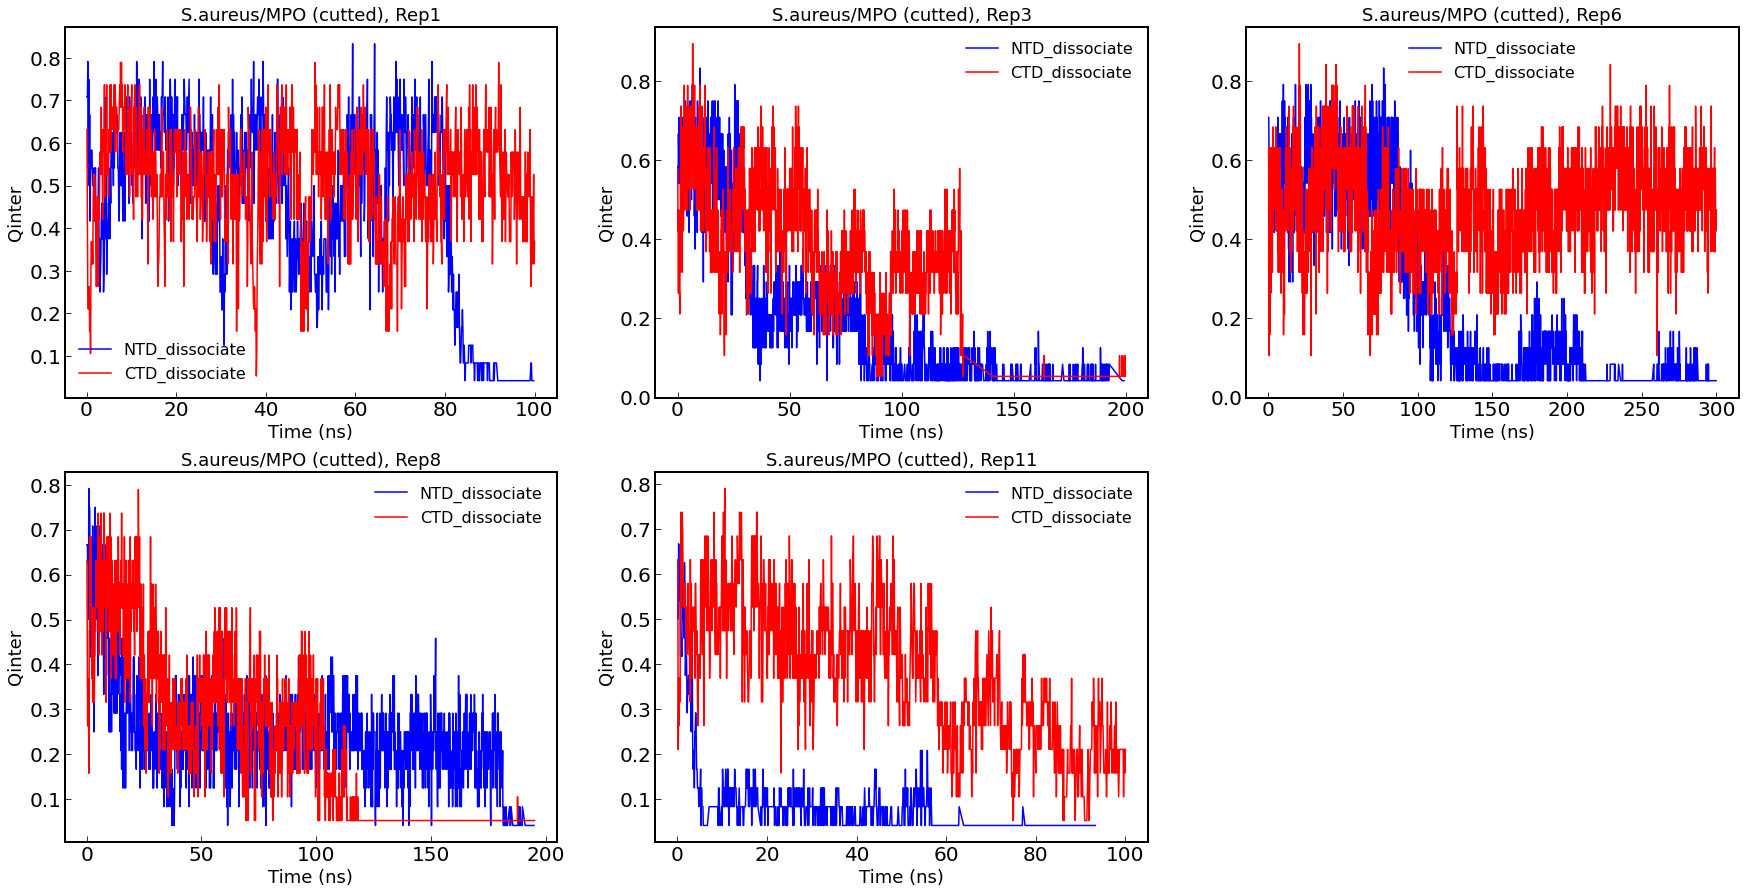

In [263]:
## data from XR's trajectory, aim for NTD/CTD dissociation rate comparision
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import colors
import seaborn as sns
# plot!
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.decomposition import PCA
%cd /home/yumzhang/pikes_work/1-spin/xr-450-dissociate/script

## Initial complex of 5uzz/MPO 
ntd=np.loadtxt('mpo-ntd.dat')
ctd=np.loadtxt('mpo-ctd.dat')
ntd=np.array(ntd,dtype=int)
ctd=np.array(ctd,dtype=int)
#print(ctd.shape,ntd.shape)
index=1
for i in [1,3,6,8,11]:
    
    #NTD/MPO first
    ntdrep=np.loadtxt('../rep'+str(i)+'/mpo-ntd-rep.dat')

    
    time=[]
    time1=0
    ## here, line [111 111] is psedo contacts line replaced by Yumeng to specifit time block.
    # ref: /home/yumzhang/pikes_work/1-spin/xr-450-dissociate/script/s6.2*.sh
    for j in range(len(ntdrep)):
        if ntdrep[j:j+1,0] != 111:
            time1=time1
            time=np.append(time,time1)
            
        else:
            time1=time1+1
            time=np.append(time,time1)
    #print('time is:',time[-1])
    
    ntdrep_t=np.column_stack( (time,ntdrep) )
    #print('new data shape by time is:',ntdrep_t.shape, ntdrep_t[-1])
    #extract rows that sarepinter are native contacts.
    ref = (ntdrep[:, None] == ntd).all(-1).any(-1)

    ref=np.repeat(ref, 3).reshape(-1,3)
    
    ntdrep_t=np.extract(ref,ntdrep_t).reshape(-1,3)

    #print('test, the last native contact is:',ntdrep_t[-1])
    # now we have time, contacts (comparing to native ones). CHange to Q!
    # we can do this by analyzing the occurance of col{m} 
    
    time_Qntd, Nntd = np.unique(ntdrep_t[:,0], return_counts=True)
    
    Qntd=Nntd/len(ntd)
    
    
    #CTD/MPO second
    ctdrep=np.loadtxt('../rep'+str(i)+'/mpo-ctd-rep.dat')
    
    #reshape to along time first!
    Time=[]
    Time1=0
    for j in range(len(ctdrep)):
        if ctdrep[j:j+1,0] != 111:
            Time1=Time1
            Time=np.append(Time,Time1)
            
        else:
            Time1=Time1+1
            Time=np.append(Time,Time1)
    #print('time is:',Time[-1])
    
    ctdrep_t=np.column_stack( (Time,ctdrep) )
    #print('new data shape by time is:',ctdrep_t.shape, ctdrep_t[-1])
    #extract rows that sarepinter are native contacts.
    ref = (ctdrep[:, None] == ctd).all(-1).any(-1)

    ref=np.repeat(ref, 3).reshape(-1,3)
    
    ctdrep_t=np.extract(ref,ctdrep_t).reshape(-1,3)

    #print('test, the last native contact is:',ctdrep_t[-1])
    # now we have time, contacts (comparing to native ones). CHange to Q!
    # we can do this by analyzing the occurance of col{m} 
    
    time_Qctd, Nctd = np.unique(ctdrep_t[:,0], return_counts=True)
    
    Qctd=Nctd/len(ctd)
    
    
    plt.rcParams["figure.figsize"] = (30,15)
    plt.subplot(2,3,index)
    plt.tick_params(axis='both', labelsize=20,direction='in',length=6)
    
    plt.plot(time_Qntd/10,Qntd,label='NTD_dissociate',c='b')
    plt.plot(time_Qctd/10,Qctd,label='CTD_dissociate',c='r')
    plt.xlabel('Time (ns)',fontsize=18)
    plt.ylabel('Qinter',fontsize=18)
    plt.title('S.aureus/MPO (cutted), Rep'+str(i),fontsize=18)
    plt.legend(fontsize=16,frameon=False)
    index=index+1

## 475-500K: CTD dissociate much faster than NTD

/home/yumzhang/pikes_work/1-spin/xr-ctd-ntd-475-500/script


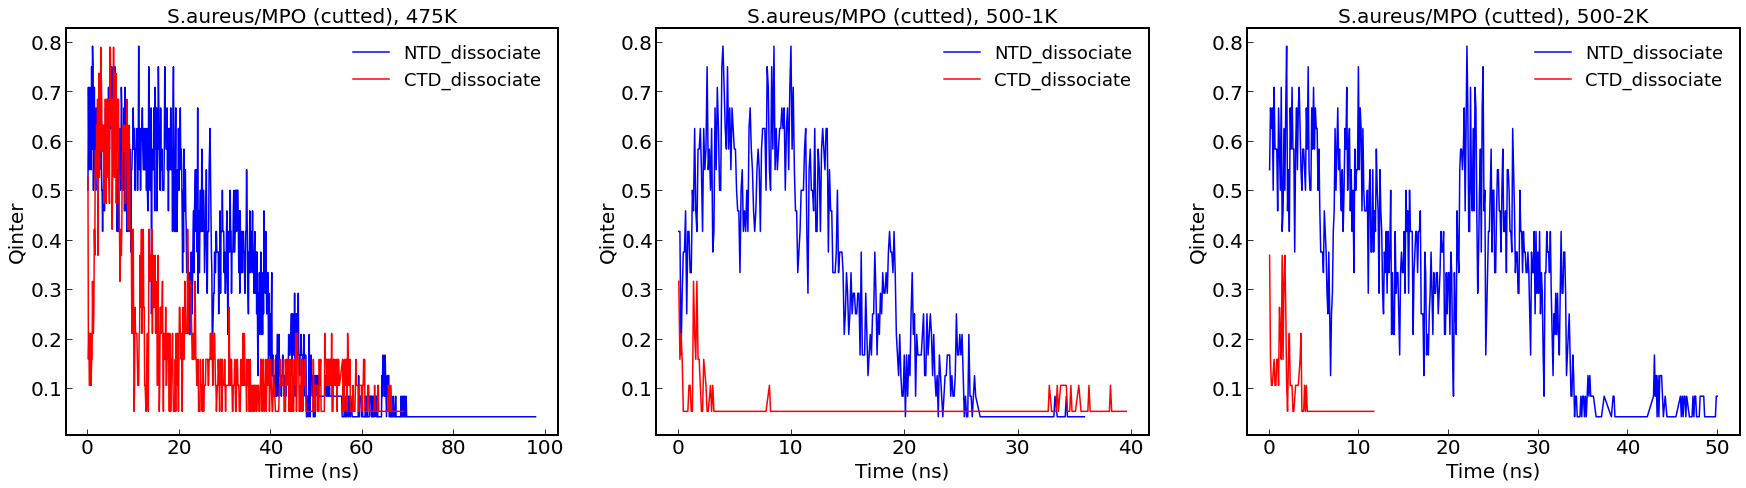

In [265]:
## data from XR's trajectory, aim for NTD/CTD dissociation rate comparision under higher T
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import colors
import seaborn as sns
# plot!
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.decomposition import PCA
%cd /home/yumzhang/pikes_work/1-spin/xr-ctd-ntd-475-500/script
## Initial complex of 5uzz/MPO 
ntd=np.loadtxt('mpo-ntd.dat')
ctd=np.loadtxt('mpo-ctd.dat')
ntd=np.array(ntd,dtype=int)
ctd=np.array(ctd,dtype=int)
#print(ctd.shape,ntd.shape)
index=1
for i in ['475','500-1','500-2']:
    
    #NTD/MPO first
    ntdrep=np.loadtxt('../'+str(i)+'/mpo-ntd-rep.dat')

    
    time=[]
    time1=0
    ## here, line [111 111] is psedo contacts line replaced by Yumeng to specifit time block.
    # ref: /home/yumzhang/pikes_work/1-spin/xr-450-dissociate/script/s6.2*.sh
    for j in range(len(ntdrep)):
        if ntdrep[j:j+1,0] != 111:
            time1=time1
            time=np.append(time,time1)
            
        else:
            time1=time1+1
            time=np.append(time,time1)
    #print('time is:',time[-1])
    
    ntdrep_t=np.column_stack( (time,ntdrep) )
    #print('new data shape by time is:',ntdrep_t.shape, ntdrep_t[-1])
    #extract rows that sarepinter are native contacts.
    ref = (ntdrep[:, None] == ntd).all(-1).any(-1)

    ref=np.repeat(ref, 3).reshape(-1,3)
    
    ntdrep_t=np.extract(ref,ntdrep_t).reshape(-1,3)

    #print('test, the last native contact is:',ntdrep_t[-1])
    # now we have time, contacts (comparing to native ones). CHange to Q!
    # we can do this by analyzing the occurance of col{m} 
    
    time_Qntd, Nntd = np.unique(ntdrep_t[:,0], return_counts=True)
    
    Qntd=Nntd/len(ntd)
    
    
    #CTD/MPO second
    ctdrep=np.loadtxt('../'+str(i)+'/mpo-ctd-rep.dat')
    
    #reshape to along time first!
    Time=[]
    Time1=0
    for j in range(len(ctdrep)):
        if ctdrep[j:j+1,0] != 111:
            Time1=Time1
            Time=np.append(Time,Time1)
            
        else:
            Time1=Time1+1
            Time=np.append(Time,Time1)
    #print('time is:',Time[-1])
    
    ctdrep_t=np.column_stack( (Time,ctdrep) )
    #print('new data shape by time is:',ctdrep_t.shape, ctdrep_t[-1])
    #extract rows that sarepinter are native contacts.
    ref = (ctdrep[:, None] == ctd).all(-1).any(-1)

    ref=np.repeat(ref, 3).reshape(-1,3)
    
    ctdrep_t=np.extract(ref,ctdrep_t).reshape(-1,3)

    #print('test, the last native contact is:',ctdrep_t[-1])
    # now we have time, contacts (comparing to native ones). CHange to Q!
    # we can do this by analyzing the occurance of col{m} 
    
    time_Qctd, Nctd = np.unique(ctdrep_t[:,0], return_counts=True)
    
    Qctd=Nctd/len(ctd)
    
    
    
    plt.rcParams["figure.figsize"] = (30,7.5)
    plt.subplot(1,3,index)
    plt.tick_params(axis='both', labelsize=20,direction='in',length=6)
    
    plt.plot(time_Qntd/10,Qntd,label='NTD_dissociate',c='b')
    plt.plot(time_Qctd/10,Qctd,label='CTD_dissociate',c='r')
    plt.xlabel('Time (ns)',fontsize=20)
    plt.ylabel('Qinter',fontsize=20)
    plt.title('S.aureus/MPO (cutted), '+str(i)+'K',fontsize=20)
    plt.legend(fontsize=18,frameon=False)
    index=index+1

**Main Results**
```
1. The dissociation process is more correlated at the lower temperature.
2. Under the high temperature, the helix bundle will unfold and loss the binding ability...
3. With being well-structured, folded region seems to bind more strongly. Therefore, NTD may dissociate faster than CTD.
```

Yumeng's point: It is reasonable that CTD has faster dissociation rate under high T since it is more exposed.

# 2. *S.aureus* vs. *S.delphini* Dissociation rate.

**Discussion Focus**
```
In this part, we need to explore the main Question:
The dissociation (binding) mechanism of the two species.

We will show te above by two main figures:
a. The dissociation fit function for inter/intra rate
b. The dissociation mechanism
```

**System**
```
Two Species simulations:
/home/yumzhang/pikes_work/1-spin/spin/5uzu-spin/dissociate-heme/s5-rep
/home/yumzhang/pikes_work/1-spin/spin/6bmt-spin/dissociate-heme/s5-rep

Setup:
a. 40 reps 
b. 450K NPT
c. only NTD free (+ some loops on MPO)
d. Cutoff for contacts (i, i+3): 4.2A
```

**Question**
```
Data collect selection: 
shall we
1. collect the whole traj for all? 
2. Or the first 50 ns only for all? 
3. Or the dissociation part for dissociated reps? (and select for about 50 ns?) 

Yumeng's current selection: all traj's first 50 ns.
potential risk: bias from those undissociated traj... (a lot)

Another: shall we include bb in contact analysis?
```

## Conclusion

**1. *S.aureus* shows higher tendency to dissociate and unfold from complex than *S.delphini*.**

Exponential Fit Function: $Q = a*e^{b*T}+c$ 

***S.aureus***

Dissociate:

$Q_{inter} = 0.29*e^{-0.12*T}+0.20$ 

Unfold:

$Q_{intra} = 0.27*e^{-0.12*T}+0.26$ 

***S.delphini***

Dissociate:

$Q_{inter} = 0.14*e^{-0.098*T}+0.34$ 

Unfold:

$Q_{intra} = 0.22*e^{-0.044*T}+0.51$ 

**Notes:**

1. The coupled binding and folding mechanism:

   *S.aureus*: correlated coupled binding and folding.

   *S.delphini*: conformational selection (dissociate first then  unfold).

2. The NTD/MPO interactions are more dynamic for *S.aureus*

   Can be obtained both from the slope of dissociation and $Q_{inter}, $Q_{intra} after 50 ns.

**2. The hairpin of *S.delphini* is more stable! Hard to unfold!**

**3. The binding mechanism:**

***S.aureus***: correlated folding and binding

***S.delphini***: conformational selection

## Dissociation analysis:
```
1. Each rep inter/intra dissociation rate (40)
2. Fitting line for inter/intra average 
3. Heatmap for mechanism exploring
```

### 2.1. Dissociation Per Rep

#### *S.aureus*

/home/yumzhang/pikes_work/1-spin/spin/5uzu-spin/dissociate-heme/s6-ana-rep


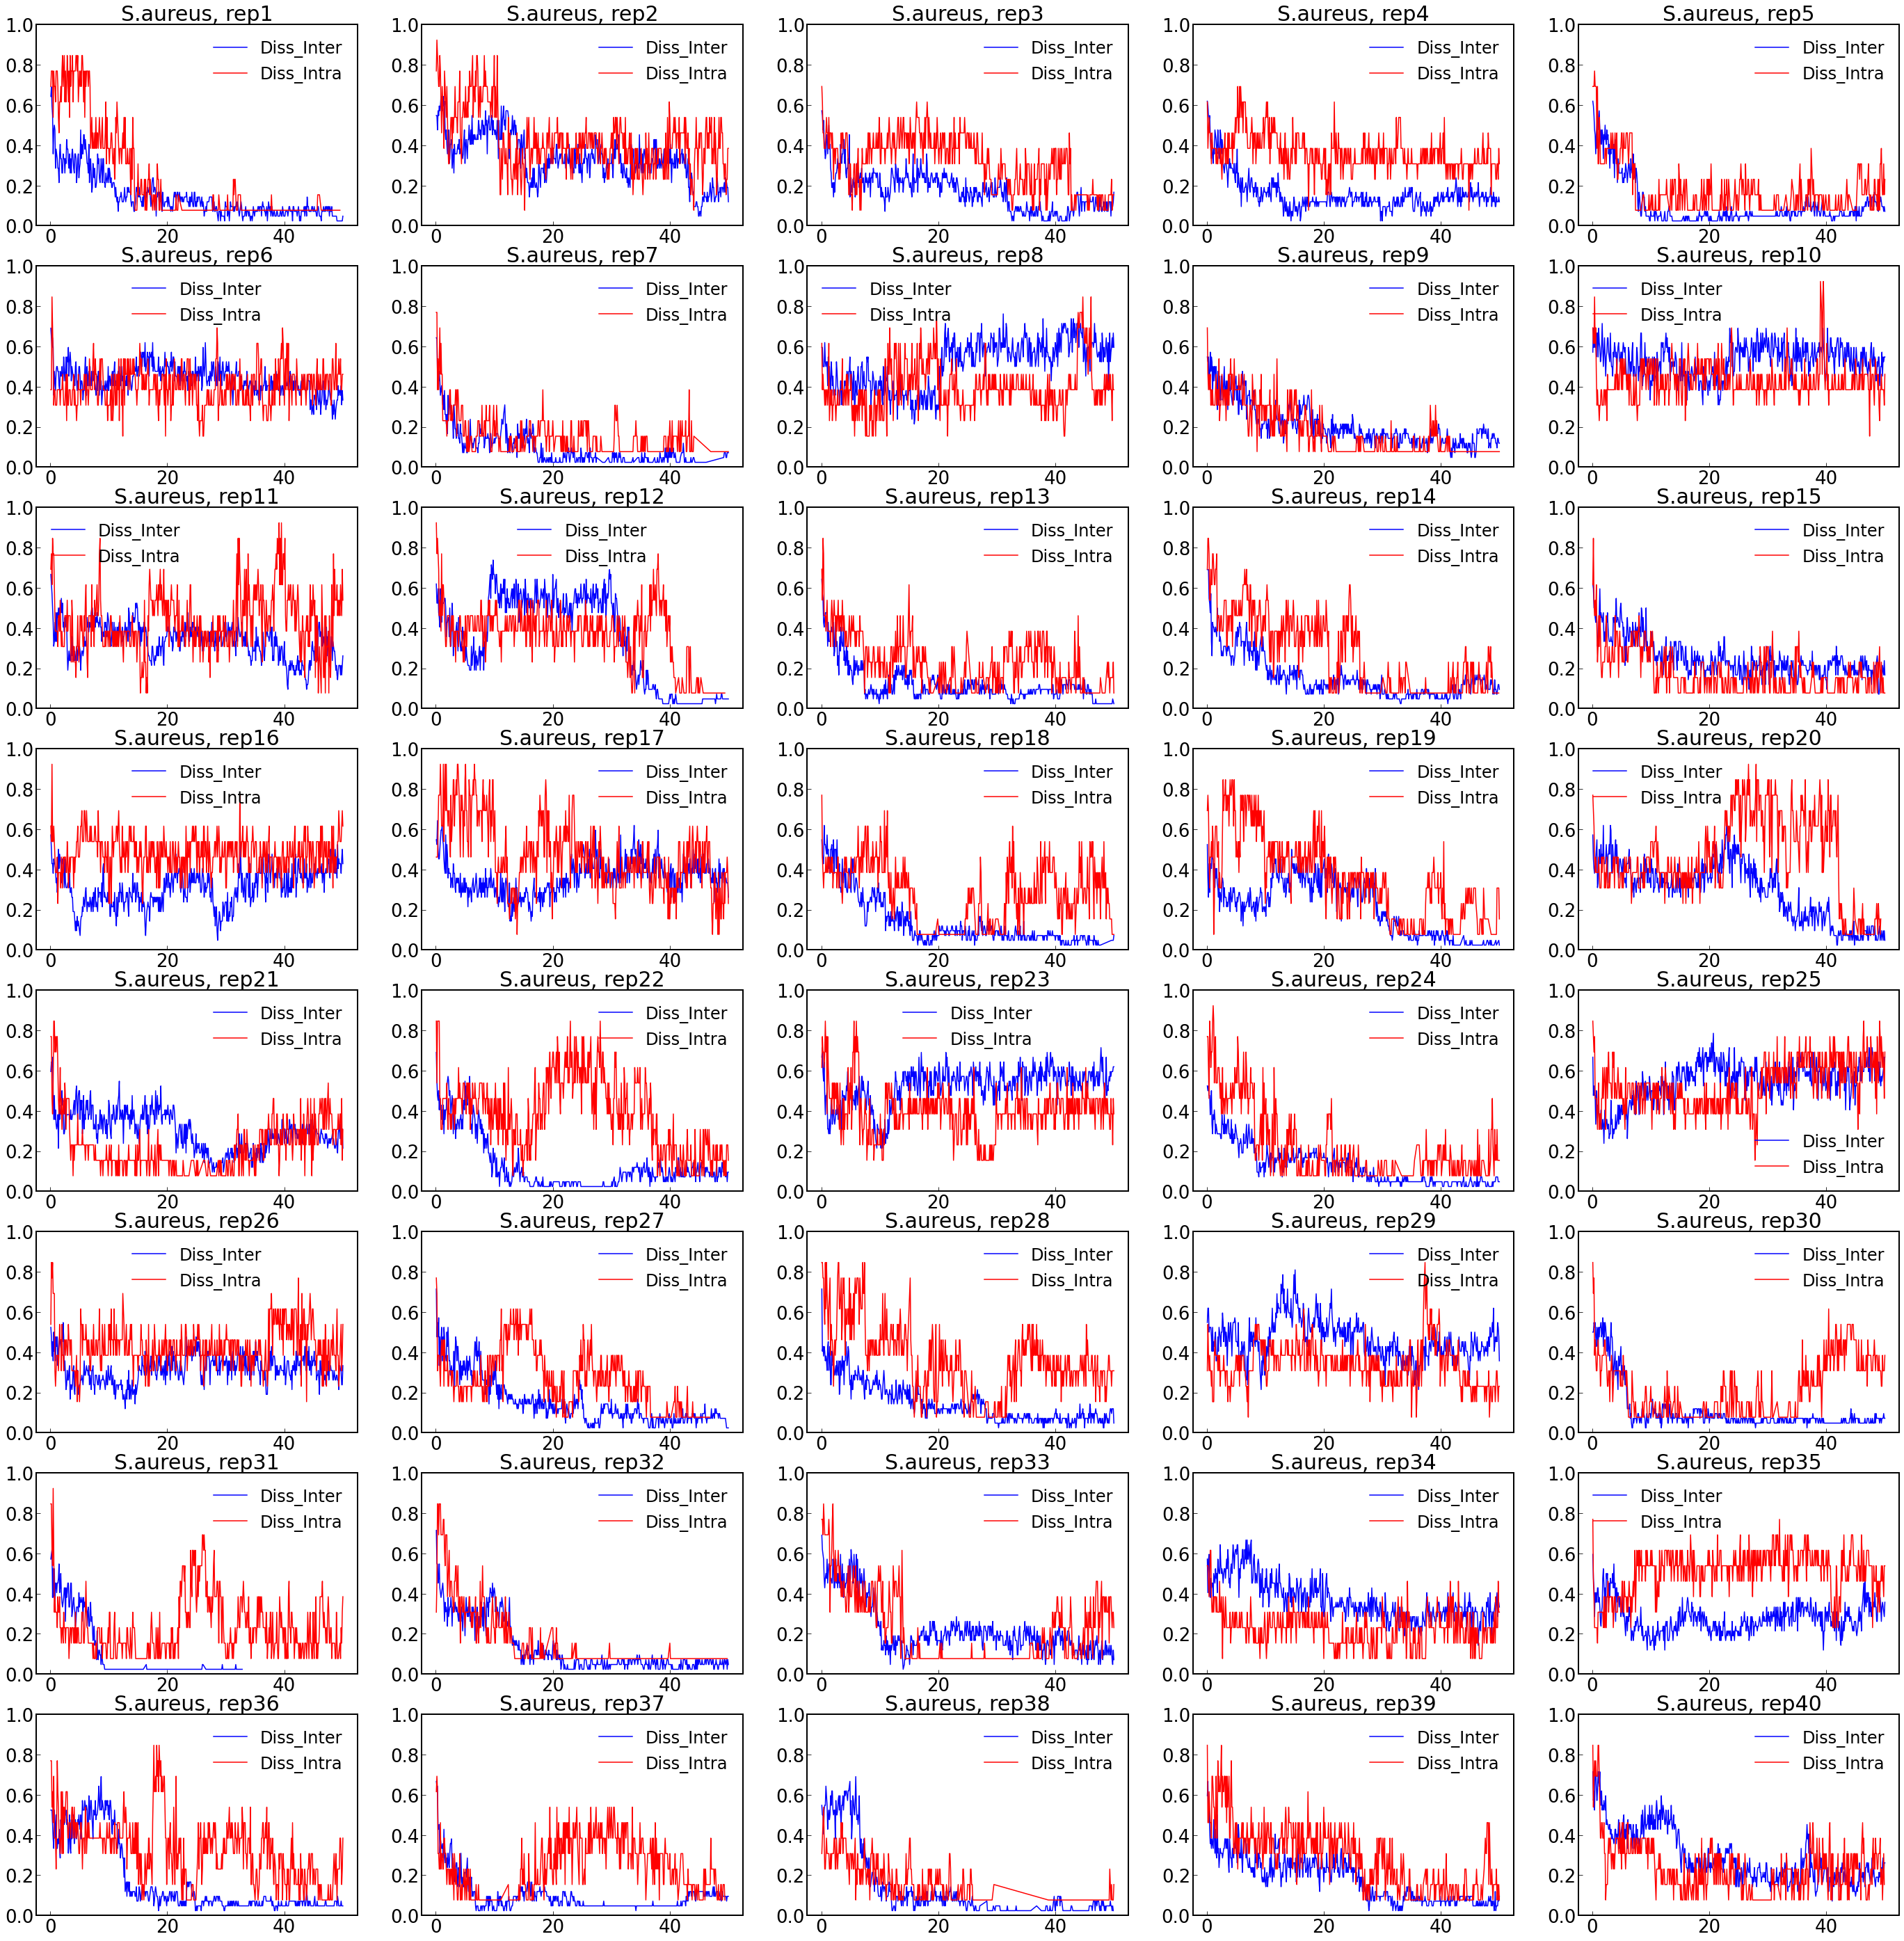

In [277]:
# S.aureus first
%cd /home/yumzhang/pikes_work/1-spin/spin/5uzu-spin/dissociate-heme/s6-ana-rep
index=1

## inter/intra of 5uzu/MPO complex
columns=[2,5]
saninter=np.loadtxt('dist-resi-native-mpo.dat',usecols=columns)
sanintra=np.loadtxt('dist-resi-native-hairpin.dat',usecols=columns)
for i in range(21,61):
    
    #NTD/MPO first
    sarepinter=np.loadtxt('450-rep'+str(i)+'/inter-'+str(i)+'.dat')
    
    time=[]
    time1=0
    ## here, line [111 111] is psedo contacts line replaced by Yumeng to specifit time block.
    # ref: /home/yumzhang/pikes_work/1-spin/xr-450-dissociate/script/s6.2*.sh
    for j in range(len(sarepinter)):
        if sarepinter[j:j+1,0] != 111:
            time1=time1
            time=np.append(time,time1)
            
        else:
            time1=time1+1
            time=np.append(time,time1)
    #print(str(i),',inter time is:',time[-1])
    
    sarepinter_t=np.column_stack( (time,sarepinter) )
    #print('new data shape by time is:',sarepinter_t.shape, sarepinter_t[-1])
    #extract rows that sarepinter are native contacts.
    ref = (sarepinter[:, None] == saninter).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepinter_t=np.extract(ref,sarepinter_t).reshape(-1,3)

    #print('sarepinter, the last native contact is:',sarepinter_t[-1])
    # now we have time, contacts (comparing to native ones). CHange to Q!
    # we can do this by analyzing the occurance of col{m} 
    
    time_Qinter, Ninter = np.unique(sarepinter_t[:,0], return_counts=True)
    
    Qinter=Ninter/len(saninter)
    
    # NTD unfold then
    sarepintra=np.loadtxt('450-rep'+str(i)+'/intra-'+str(i)+'.dat')
    
    Time=[]
    Time1=0
    ## here, line [111 111] is psedo contacts line replaced by Yumeng to specifit time block.
    # ref: /home/yumzhang/pikes_work/1-spin/xr-450-dissociate/script/s6.2*.sh
    for j in range(len(sarepintra)):
        if sarepintra[j:j+1,0] != 111:
            Time1=Time1
            Time=np.append(Time,Time1)
            
        else:
            Time1=Time1+1
            Time=np.append(Time,Time1)
    #print(str(i),',intra time is:',Time[-1])
    
    sarepintra_t=np.column_stack( (Time,sarepintra) )
    #print('new data shape by time is:',sarepintra_t.shape, sarepintra_t[-1])
    #extract rows that sarepinter are native contacts.
    ref = (sarepintra[:, None] == sanintra).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepintra_t=np.extract(ref,sarepintra_t).reshape(-1,3)

    #print('sarepintra, the last native contact is:',sarepintra_t[-1])
    # now we have time, contacts (comparing to native ones). CHange to Q!
    # we can do this by analyzing the occurance of col{m} 
    
    time_Qintra, Nintra = np.unique(sarepintra_t[:,0], return_counts=True)
    
    Qintra=Nintra/len(sanintra)
    #fig, ax = plt.subplots(figsize=(6, 5))
    plt.rcParams["figure.figsize"] = (48,50)
    plt.subplot(8,5,index)
    plt.plot(time_Qinter/10,Qinter,label='Diss_Inter',c='b')
    plt.plot(time_Qintra/10,Qintra,label='Diss_Intra',c='r')
    plt.title('S.aureus, rep'+str(i-20),fontsize=30)
    plt.ylim([0,1])
    plt.legend(fontsize=24,frameon=False)
    plt.tick_params(axis='both', labelsize=26,direction='in',length=6)
    plt.rcParams['axes.linewidth'] = 2
    index=index+1

In [294]:
# S.aureus quick_summary
%cd /home/yumzhang/pikes_work/1-spin/spin/5uzu-spin/dissociate-heme/s6-ana-rep

index=1
rep=40

## inter/intra of 5uzu/MPO complex
columns=[2,5]
saninter=np.loadtxt('dist-resi-native-mpo.dat',usecols=columns)
sanintra=np.loadtxt('dist-resi-native-hairpin.dat',usecols=columns)

#Qinter first
inter=np.zeros(501)
intra=np.zeros(501)
cond_A=['Cond_A, Bound and Fold: Rep']
cond_B=['Cond_B, Bound but Unfold: Rep']
cond_C=['Cond_C, Dissociate but Fold: Rep']
cond_D=['Cond_D, Dissociate and Unfold: Rep']

for i in range(21,61):
    
    sarepinter=np.loadtxt('450-rep'+str(i)+'/inter-'+str(i)+'.dat')
    
    time=[]
    time1=0
    
    for j in range(len(sarepinter)):
        if sarepinter[j:j+1,0] != 111:
            time1=time1
            time=np.append(time,time1)
            
        else:
            time1=time1+1
            time=np.append(time,time1)
    
    sarepinter_t=np.column_stack( (time,sarepinter) )
    #extract rows that sarepinter are native contacts.
    ref = (sarepinter[:, None] == saninter).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepinter_t=np.extract(ref,sarepinter_t).reshape(-1,3)
    time_Qinter, Ninter = np.unique(sarepinter_t[:,0], return_counts=True)
    data_inter=np.column_stack((time_Qinter, Ninter))
    # add a fake last frame to ensure the later make up will come to the last frame
    last_fake_data= np.array([501,0])
    data_inter = np.vstack([data_inter,last_fake_data])
    #print(data_inter.shape)
    # make up missing frame, no native contact frames
    for order in range(0,501):
        if data_inter[order:order+1,0] != order:
            # In the following line, 1st order is the index before which to insert, 0 is the axis.
            data_inter=np.insert(data_inter, order, np.array((order, 0)), 0)
    data_inter[0]=[0,len(saninter)]
    # Now the data contain 502 frame: 1st initial conf, last fake capping
    # remove the fake last frame, and the first 10 ns
    data_inter=data_inter[100:501]
    
    Qinter=data_inter[:,1]/len(saninter)
    ave_inter=np.mean(Qinter)
    
    ### change to intra
    sarepintra=np.loadtxt('450-rep'+str(i)+'/intra-'+str(i)+'.dat')
    
    Time=[]
    Time1=0
    ## here, line [111 111] is psedo contacts line replaced by Yumeng to specifit time block.
    # ref: /home/yumzhang/pikes_work/1-spin/xr-450-dissociate/script/s6.2*.sh
    for j in range(len(sarepintra)):
        if sarepintra[j:j+1,0] != 111:
            Time1=Time1
            Time=np.append(Time,Time1)
            
        else:
            Time1=Time1+1
            Time=np.append(Time,Time1)
    
    sarepintra_t=np.column_stack( (Time,sarepintra) )
    
    #extract rows that sarepintra are native contacts.
    ref = (sarepintra[:, None] == sanintra).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepintra_t=np.extract(ref,sarepintra_t).reshape(-1,3)
    
    # now we have time, contacts (comparing to native ones). CHange to Q!
    # we can do this by analyzing the occurance of col{m} 
    
    time_Qintra, Nintra = np.unique(sarepintra_t[:,0], return_counts=True)
    
    data_intra=np.column_stack((time_Qintra, Nintra))
    
    # add a fake last frame to ensure the later make up will come to the last frame
    last_fake_data= np.array([501,0])
    data_intra = np.vstack([data_intra,last_fake_data])
    
    # make up missing frame, no native contact frames
    for order in range(0,501):
        if data_intra[order:order+1,0] != order:
            # In the following line, 1st order is the index before which to insert, 0 is the axis.
            data_intra=np.insert(data_intra, order, np.array((order, 0)), 0)
    data_intra[0]=[0,len(sanintra)]
    # Now the data contain 502 frame: 1st initial conf, last fake capping
    # remove the fake last frame, and the first 10 ns
    data_intra=data_intra[100:501]
    Qintra=data_intra[:,1]/len(sanintra)
    ave_intra=np.mean(Qintra)
    
    if ave_inter >0.45 and ave_intra >0.45:
        cond_A=np.append(cond_A,int(i-20))
    if ave_inter >0.45 and ave_intra <=0.45:
        cond_B=np.append(cond_B,int(i-20))
    if ave_inter <=0.45 and ave_intra >0.45:
        cond_C=np.append(cond_C,int(i-20))
    if ave_inter <=0.45 and ave_intra <=0.45:
        cond_D=np.append(cond_D,int(i-20))
        
print('S.aureus:')    
print(". ".join(cond_A))
print(". ".join(cond_B))
print(". ".join(cond_C))
print(". ".join(cond_D))

/home/yumzhang/pikes_work/1-spin/spin/5uzu-spin/dissociate-heme/s6-ana-rep
S.aureus:
Cond_A, Bound and Fold: Rep. 25
Cond_B, Bound but Unfold: Rep. 8. 10. 23. 29
Cond_C, Dissociate but Fold: Rep. 16. 20. 35
Cond_D, Dissociate and Unfold: Rep. 1. 2. 3. 4. 5. 6. 7. 9. 11. 12. 13. 14. 15. 17. 18. 19. 21. 22. 24. 26. 27. 28. 30. 31. 32. 33. 34. 36. 37. 38. 39. 40


**Sub-conclusions:**

1. Most replicas dissociate and unfold within 50ns in *S.aureus*/MPO complex.

2. A few replicas unfold but not fully dissociate (4), while some others unbound but partially folded (3)

   However, reps in Cond_B and Cond_C actually show highly correlated unfolding and unbinding fractions.

4. ***S.aureus/MPO*** is a less stable complex. And the dissociation is highly correlated with the unfolding process.

5. Again, NTD of *S.aureus* is more dynamic.


#### *S.delphini*

/home/yumzhang/pikes_work/1-spin/spin/6bmt-spin/dissociate-heme/s6-ana-rep


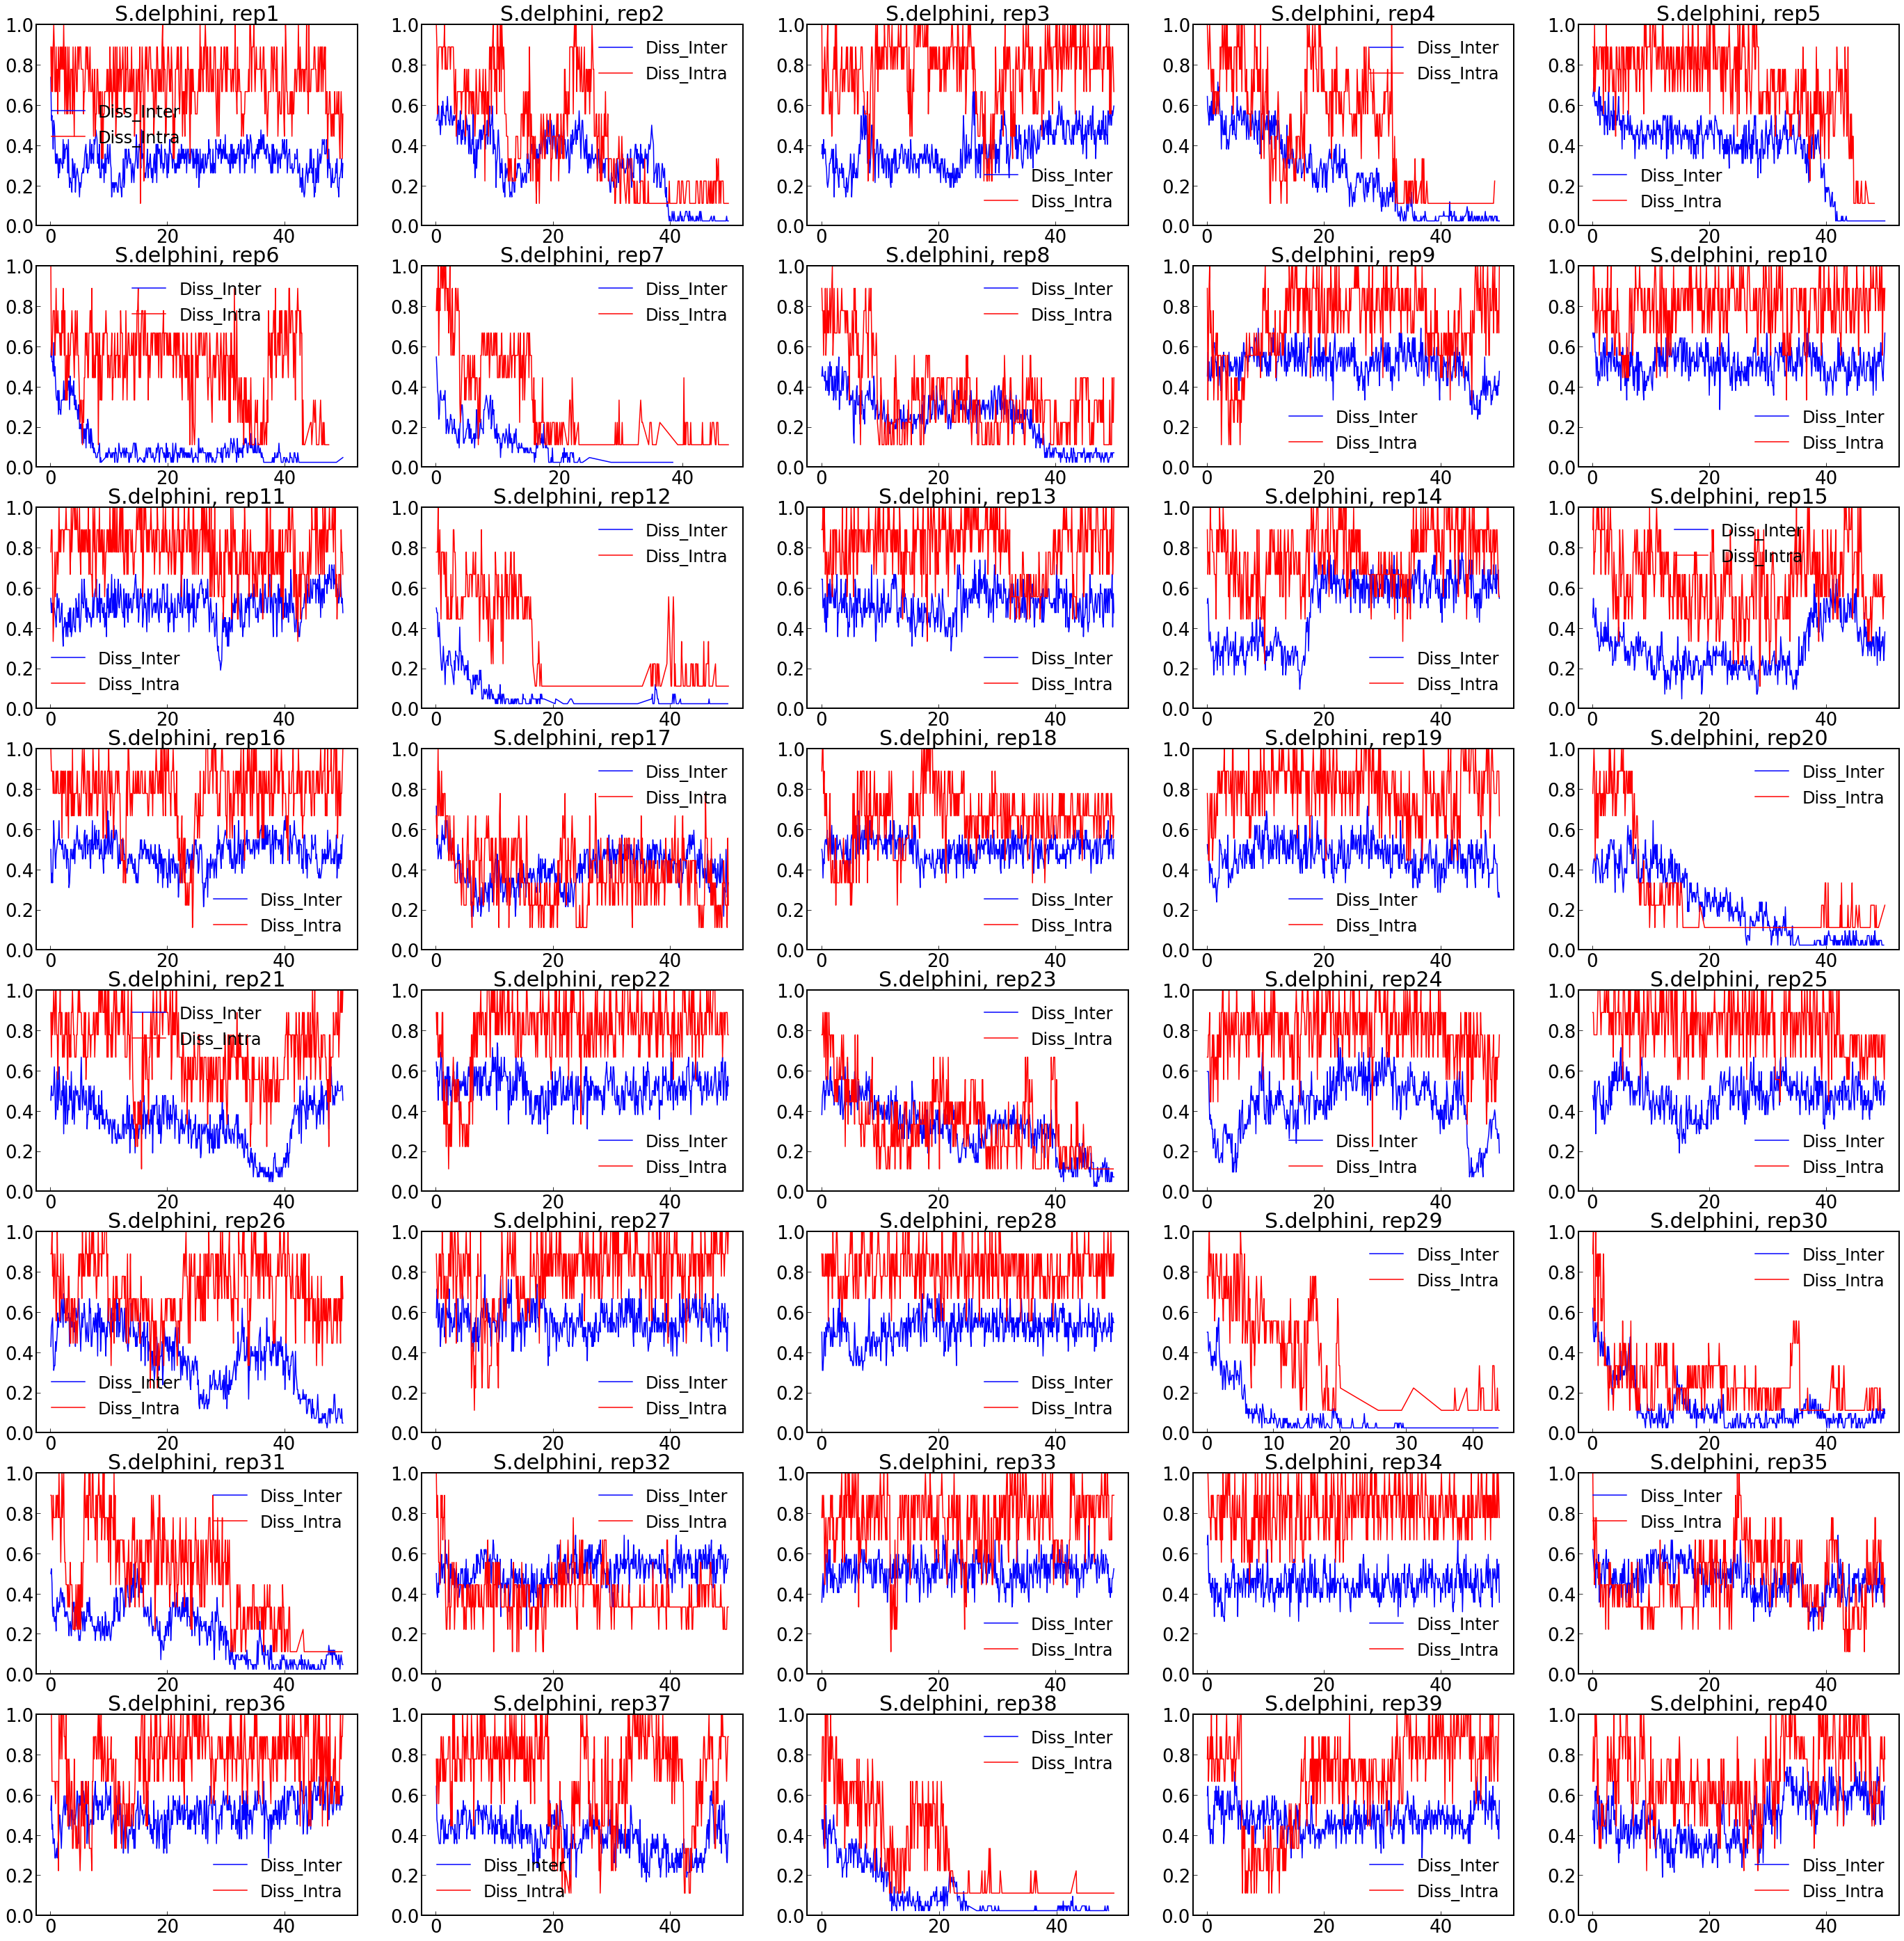

In [278]:
# S.delphini then
%cd /home/yumzhang/pikes_work/1-spin/spin/6bmt-spin/dissociate-heme/s6-ana-rep
index=1
plt.tick_params(axis='both', labelsize=16,direction='in',length=6)

## inter/intra of 6bmt/MPO complex
columns=[2,5]
saninter=np.loadtxt('dist-resi-native-mpo.dat',usecols=columns)
sanintra=np.loadtxt('dist-resi-native-hairpin.dat',usecols=columns)
for i in range(21,61):
    
    #NTD/MPO first
    sarepinter=np.loadtxt('450-rep'+str(i)+'/inter-'+str(i)+'.dat')
    
    time=[]
    time1=0
    ## here, line [111 111] is psedo contacts line replaced by Yumeng to specifit time block.
    # ref: /home/yumzhang/pikes_work/1-spin/xr-450-dissociate/script/s6.2*.sh
    for j in range(len(sarepinter)):
        if sarepinter[j:j+1,0] != 111:
            time1=time1
            time=np.append(time,time1)
            
        else:
            time1=time1+1
            time=np.append(time,time1)
    #print(str(i),',inter time is:',time[-1])
    
    sarepinter_t=np.column_stack( (time,sarepinter) )
    #print('new data shape by time is:',sarepinter_t.shape, sarepinter_t[-1])
    #extract rows that sarepinter are native contacts.
    ref = (sarepinter[:, None] == saninter).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepinter_t=np.extract(ref,sarepinter_t).reshape(-1,3)

    #print('sarepinter, the last native contact is:',sarepinter_t[-1])
    # now we have time, contacts (comparing to native ones). CHange to Q!
    # we can do this by analyzing the occurance of col{m} 
    
    time_Qinter, Ninter = np.unique(sarepinter_t[:,0], return_counts=True)
    
    Qinter=Ninter/len(saninter)
    
    # NTD unfold then
    sarepintra=np.loadtxt('450-rep'+str(i)+'/intra-'+str(i)+'.dat')
    
    Time=[]
    Time1=0
    ## here, line [111 111] is psedo contacts line replaced by Yumeng to specifit time block.
    # ref: /home/yumzhang/pikes_work/1-spin/xr-450-dissociate/script/s6.2*.sh
    for j in range(len(sarepintra)):
        if sarepintra[j:j+1,0] != 111:
            Time1=Time1
            Time=np.append(Time,Time1)
            
        else:
            Time1=Time1+1
            Time=np.append(Time,Time1)
    #print(str(i),',intra time is:',Time[-1])
    
    sarepintra_t=np.column_stack( (Time,sarepintra) )
    #print('new data shape by time is:',sarepintra_t.shape, sarepintra_t[-1])
    #extract rows that sarepinter are native contacts.
    ref = (sarepintra[:, None] == sanintra).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepintra_t=np.extract(ref,sarepintra_t).reshape(-1,3)

    #print('sarepintra, the last native contact is:',sarepintra_t[-1])
    # now we have time, contacts (comparing to native ones). CHange to Q!
    # we can do this by analyzing the occurance of col{m} 
    
    time_Qintra, Nintra = np.unique(sarepintra_t[:,0], return_counts=True)
    
    Qintra=Nintra/len(sanintra)
    #fig, ax = plt.subplots(figsize=(6, 5))
    plt.rcParams["figure.figsize"] = (48,50)
    plt.subplot(8,5,index)
    plt.plot(time_Qinter/10,Qinter,label='Diss_Inter',c='b')
    plt.plot(time_Qintra/10,Qintra,label='Diss_Intra',c='r')
    plt.title('S.delphini, rep'+str(i-20),fontsize=30)
    plt.ylim([0,1])
    plt.legend(fontsize=24,frameon=False)
    plt.tick_params(axis='both', labelsize=26,direction='in',length=6)
    plt.rcParams['axes.linewidth'] = 2
    index=index+1

In [295]:
# S.aureus quick_summary
%cd /home/yumzhang/pikes_work/1-spin/spin/6bmt-spin/dissociate-heme/s6-ana-rep

index=1
rep=40

## inter/intra of 5uzu/MPO complex
columns=[2,5]
saninter=np.loadtxt('dist-resi-native-mpo.dat',usecols=columns)
sanintra=np.loadtxt('dist-resi-native-hairpin.dat',usecols=columns)

#Qinter first
inter=np.zeros(501)
intra=np.zeros(501)
cond_A=['Cond_A, Bound and Fold: Rep']
cond_B=['Cond_B, Bound but Unfold: Rep']
cond_C=['Cond_C, Dissociate but Fold: Rep']
cond_D=['Cond_D, Dissociate and Unfold: Rep']
for i in range(21,61):
    
    sarepinter=np.loadtxt('450-rep'+str(i)+'/inter-'+str(i)+'.dat')
    
    time=[]
    time1=0
    
    for j in range(len(sarepinter)):
        if sarepinter[j:j+1,0] != 111:
            time1=time1
            time=np.append(time,time1)
            
        else:
            time1=time1+1
            time=np.append(time,time1)
    
    sarepinter_t=np.column_stack( (time,sarepinter) )
    #extract rows that sarepinter are native contacts.
    ref = (sarepinter[:, None] == saninter).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepinter_t=np.extract(ref,sarepinter_t).reshape(-1,3)
    time_Qinter, Ninter = np.unique(sarepinter_t[:,0], return_counts=True)
    data_inter=np.column_stack((time_Qinter, Ninter))
    # add a fake last frame to ensure the later make up will come to the last frame
    last_fake_data= np.array([501,0])
    data_inter = np.vstack([data_inter,last_fake_data])
    #print(data_inter.shape)
    # make up missing frame, no native contact frames
    for order in range(0,501):
        if data_inter[order:order+1,0] != order:
            # In the following line, 1st order is the index before which to insert, 0 is the axis.
            data_inter=np.insert(data_inter, order, np.array((order, 0)), 0)
    data_inter[0]=[0,len(saninter)]
    # Now the data contain 502 frame: 1st initial conf, last fake capping
    # remove the fake last frame, and the first 10 ns
    data_inter=data_inter[100:501]
    
    Qinter=data_inter[:,1]/len(saninter)
    ave_inter=np.mean(Qinter)
    
    ### change to intra
    sarepintra=np.loadtxt('450-rep'+str(i)+'/intra-'+str(i)+'.dat')
    
    Time=[]
    Time1=0
    ## here, line [111 111] is psedo contacts line replaced by Yumeng to specifit time block.
    # ref: /home/yumzhang/pikes_work/1-spin/xr-450-dissociate/script/s6.2*.sh
    for j in range(len(sarepintra)):
        if sarepintra[j:j+1,0] != 111:
            Time1=Time1
            Time=np.append(Time,Time1)
            
        else:
            Time1=Time1+1
            Time=np.append(Time,Time1)
    
    sarepintra_t=np.column_stack( (Time,sarepintra) )
    
    #extract rows that sarepintra are native contacts.
    ref = (sarepintra[:, None] == sanintra).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepintra_t=np.extract(ref,sarepintra_t).reshape(-1,3)
    
    # now we have time, contacts (comparing to native ones). CHange to Q!
    # we can do this by analyzing the occurance of col{m} 
    
    time_Qintra, Nintra = np.unique(sarepintra_t[:,0], return_counts=True)
    
    data_intra=np.column_stack((time_Qintra, Nintra))
    
    # add a fake last frame to ensure the later make up will come to the last frame
    last_fake_data= np.array([501,0])
    data_intra = np.vstack([data_intra,last_fake_data])
    
    # make up missing frame, no native contact frames
    for order in range(0,501):
        if data_intra[order:order+1,0] != order:
            # In the following line, 1st order is the index before which to insert, 0 is the axis.
            data_intra=np.insert(data_intra, order, np.array((order, 0)), 0)
    data_intra[0]=[0,len(sanintra)]
    # Now the data contain 502 frame: 1st initial conf, last fake capping
    # remove the fake last frame, and the first 10 ns
    data_intra=data_intra[100:501]
    Qintra=data_intra[:,1]/len(sanintra)
    ave_intra=np.mean(Qintra)
    
    
    
    if ave_inter >0.45 and ave_intra >0.45:
        cond_A=np.append(cond_A,int(i-20))
    if ave_inter >0.45 and ave_intra <=0.45:
        cond_B=np.append(cond_B,int(i-20))
    if ave_inter <=0.45 and ave_intra >0.45:
        cond_C=np.append(cond_C,int(i-20))
    if ave_inter <=0.45 and ave_intra <=0.45:
        cond_D=np.append(cond_D,int(i-20))
        
print('S.delphini:')    
print(". ".join(cond_A))
print(". ".join(cond_B))
print(". ".join(cond_C))
print(". ".join(cond_D))

/home/yumzhang/pikes_work/1-spin/spin/6bmt-spin/dissociate-heme/s6-ana-rep
S.delphini:
Cond_A, Bound and Fold: Rep. 9. 10. 11. 13. 14. 16. 18. 19. 22. 25. 27. 28. 33. 35. 36. 39. 40
Cond_B, Bound but Unfold: Rep. 32
Cond_C, Dissociate but Fold: Rep. 1. 3. 5. 15. 21. 24. 26. 34. 37
Cond_D, Dissociate and Unfold: Rep. 2. 4. 6. 7. 8. 12. 17. 20. 23. 29. 30. 31. 38


**Sub-conclusions:**

1. Most replicas keep bound and folded within 50ns in *S.delphini*/MPO complex.

2. For those dissociated ones, most *S.delphini*-NTD keeps folded.

3. *S.delphini* forms a more "stable" complex, and has very different dissociation process comparing to *S.aureus*.

4. ***S.delphini*** prefers the conformational_selection mechanism.


### 2.2. Average Fit line

#### *S.aureus* 

/home/yumzhang/pikes_work/1-spin/spin/5uzu-spin/dissociate-heme/s6-ana-rep
fit_inter: a 0.2942414199189714 fit_inter: b -0.12075644872179078 fit_inter: c 0.2009477521727789
fit_intra: a 0.2740137774053931 fit_intra: b -0.11786481296452123 fit_intra: c 0.2567853869857925


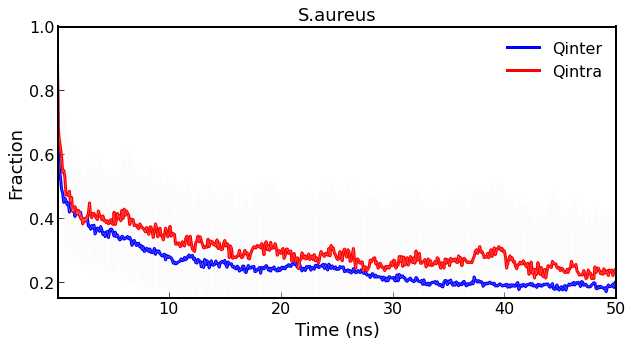

In [201]:
# S.aureus first
%cd /home/yumzhang/pikes_work/1-spin/spin/5uzu-spin/dissociate-heme/s6-ana-rep

import scipy as scipy
from scipy.optimize import curve_fit

def exp_fit(x,a,b,c):
    y = a*np.exp(b*x)+c
    return y

index=1
rep=40

## inter/intra of 5uzu/MPO complex
columns=[2,5]
saninter=np.loadtxt('dist-resi-native-mpo.dat',usecols=columns)
sanintra=np.loadtxt('dist-resi-native-hairpin.dat',usecols=columns)

#Qinter first
inter=np.zeros(501)
for i in range(21,61):
    
    sarepinter=np.loadtxt('450-rep'+str(i)+'/inter-'+str(i)+'.dat')
    
    time=[]
    time1=0
    ## here, line [111 111] is psedo contacts line replaced by Yumeng to specifit time block.
    # ref: /home/yumzhang/pikes_work/1-spin/xr-450-dissociate/script/s6.2*.sh
    for j in range(len(sarepinter)):
        if sarepinter[j:j+1,0] != 111:
            time1=time1
            time=np.append(time,time1)
            
        else:
            time1=time1+1
            time=np.append(time,time1)
    
    sarepinter_t=np.column_stack( (time,sarepinter) )
    #print('new data shape by time is:',sarepinter_t.shape, sarepinter_t[-1])
    #extract rows that sarepinter are native contacts.
    ref = (sarepinter[:, None] == saninter).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepinter_t=np.extract(ref,sarepinter_t).reshape(-1,3)

    #print('sarepinter, the last native contact is:',sarepinter_t[-1])
    # now we have time, contacts (comparing to native ones). CHange to Q!
    # we can do this by analyzing the occurance of col{m} 
    
    time_Qinter, Ninter = np.unique(sarepinter_t[:,0], return_counts=True)
    #print(time_Qinter.shape,Ninter.shape)
    data_inter=np.column_stack((time_Qinter, Ninter))
    #print(data_inter.shape)
    # add a fake last frame to ensure the later make up will come to the last frame
    last_fake_data= np.array([501,0])
    data_inter = np.vstack([data_inter,last_fake_data])
    #print(data_inter.shape)
    # make up missing frame, no native contact frames
    for order in range(0,501):
        if data_inter[order:order+1,0] != order:
            # In the following line, 1st order is the index before which to insert, 0 is the axis.
            data_inter=np.insert(data_inter, order, np.array((order, 0)), 0)
    data_inter[0]=[0,len(saninter)]
    # Now the data contain 502 frame: 1st initial conf, last fake capping
    #print(data_inter.shape)
    # remove the fake last frame
    data_inter=data_inter[0:501]
    #print(data_inter.shape)  
    Qinter=data_inter[:,1]/len(saninter)
    inter=np.c_[Qinter, inter]
## Note that now the last column of the Qinter is zero.
#print(inter[101])
# remove the last column
inter=inter[:,0:rep]
ave_inter=np.mean(inter,axis=1)
std_inter=np.std(inter,axis=1)

## fit function:
poptinter, pcovinter = scipy.optimize.curve_fit(exp_fit, data_inter[:,0]/10, ave_inter,p0=[1,-0.5,1])

print("fit_inter: a",poptinter[0],
      "fit_inter: b",poptinter[1],
      "fit_inter: c",poptinter[2],)


#Qintra then
intra=np.zeros(501)
for i in range(21,61):
    
    sarepintra=np.loadtxt('450-rep'+str(i)+'/intra-'+str(i)+'.dat')
    
    Time=[]
    Time1=0
    ## here, line [111 111] is psedo contacts line replaced by Yumeng to specifit time block.
    # ref: /home/yumzhang/pikes_work/1-spin/xr-450-dissociate/script/s6.2*.sh
    for j in range(len(sarepintra)):
        if sarepintra[j:j+1,0] != 111:
            Time1=Time1
            Time=np.append(Time,Time1)
            
        else:
            Time1=Time1+1
            Time=np.append(Time,Time1)
    
    sarepintra_t=np.column_stack( (Time,sarepintra) )
    
    #extract rows that sarepintra are native contacts.
    ref = (sarepintra[:, None] == sanintra).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepintra_t=np.extract(ref,sarepintra_t).reshape(-1,3)

    
    # now we have time, contacts (comparing to native ones). CHange to Q!
    # we can do this by analyzing the occurance of col{m} 
    
    time_Qintra, Nintra = np.unique(sarepintra_t[:,0], return_counts=True)
    
    data_intra=np.column_stack((time_Qintra, Nintra))
    
    # add a fake last frame to ensure the later make up will come to the last frame
    last_fake_data= np.array([501,0])
    data_intra = np.vstack([data_intra,last_fake_data])
    
    # make up missing frame, no native contact frames
    for order in range(0,501):
        if data_intra[order:order+1,0] != order:
            # In the following line, 1st order is the index before which to insert, 0 is the axis.
            data_intra=np.insert(data_intra, order, np.array((order, 0)), 0)
    data_intra[0]=[0,len(sanintra)]
    # Now the data contain 502 frame: 1st initial conf, last fake capping
    # remove the fake last frame
    data_intra=data_intra[0:501]
    Qintra=data_intra[:,1]/len(sanintra)
    intra=np.c_[Qintra, intra]
## Note that now the last column of the Qintra is zero.
# remove the last column
intra=intra[:,0:rep]
ave_intra=np.mean(intra,axis=1)
std_intra=np.std(intra,axis=1)

poptintra, pcovintra = scipy.optimize.curve_fit(exp_fit, data_intra[:,0]/10, ave_intra,p0=[1,-0.5,1])

print("fit_intra: a",poptintra[0],
      "fit_intra: b",poptintra[1],
      "fit_intra: c",poptintra[2],)

plt.plot(data_intra[:,0]/10,ave_inter,color='b',label='Qinter',linewidth=3)
plt.plot(data_intra[:,0]/10,ave_intra,color='r',label='Qintra',linewidth=3)
plt.errorbar(data_inter[:,0]/10,ave_inter,yerr=std_inter,linewidth=0.2,color='snow')
plt.errorbar(data_intra[:,0]/10,ave_intra,yerr=std_intra,linewidth=0.2,color='whitesmoke')
plt.legend(fontsize=16,frameon=False)
plt.ylim([0.15,1])
plt.xlim([0.1,50])
plt.title("S.aureus",fontsize=18)
plt.xlabel("Time (ns)", fontsize=18)
plt.ylabel("Fraction", fontsize=18)
plt.tick_params(axis='both', labelsize=16,direction='in',length=6)
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["figure.figsize"] = (10,5)


**Conclusions**

***S.aureus***

Dissociate:

$Q_{inter} = 0.29*e^{-0.12*T}+0.20$ 

Unfold:

$Q_{intra} = 0.27*e^{-0.12*T}+0.26$ 

Highly Correlated.


#### *S.delphini*

/home/yumzhang/pikes_work/1-spin/spin/6bmt-spin/dissociate-heme/s6-ana-rep
fit_inter: a 0.14150652467524488 fit_inter: b -0.09784956439803547 fit_inter: c 0.3418161045597166
fit_intra: a 0.22257152582093648 fit_intra: b -0.044143134975955366 fit_intra: c 0.5056333894199447


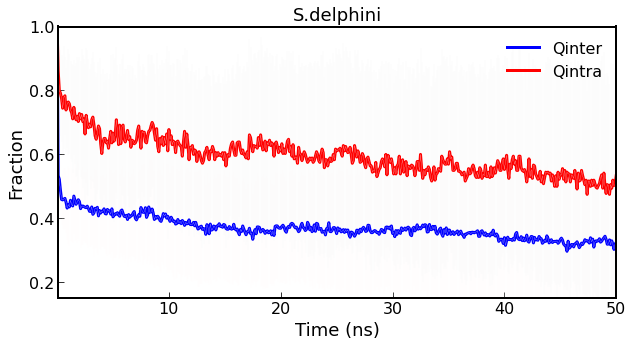

In [202]:
# S.delphini then
%cd /home/yumzhang/pikes_work/1-spin/spin/6bmt-spin/dissociate-heme/s6-ana-rep

import scipy as scipy
from scipy.optimize import curve_fit

def exp_fit(x,a,b,c):
    y = a*np.exp(b*x)+c
    return y

index=1
rep=40

## inter/intra of 6bmt/MPO complex
columns=[2,5]
saninter=np.loadtxt('dist-resi-native-mpo.dat',usecols=columns)
sanintra=np.loadtxt('dist-resi-native-hairpin.dat',usecols=columns)

#Qinter first
inter=np.zeros(501)
for i in range(21,61):
    
    sarepinter=np.loadtxt('450-rep'+str(i)+'/inter-'+str(i)+'.dat')
    
    time=[]
    time1=0
    for j in range(len(sarepinter)):
        if sarepinter[j:j+1,0] != 111:
            time1=time1
            time=np.append(time,time1)
            
        else:
            time1=time1+1
            time=np.append(time,time1)
    
    sarepinter_t=np.column_stack( (time,sarepinter) )
    ref = (sarepinter[:, None] == saninter).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepinter_t=np.extract(ref,sarepinter_t).reshape(-1,3)
    
    time_Qinter, Ninter = np.unique(sarepinter_t[:,0], return_counts=True)
    data_inter=np.column_stack((time_Qinter, Ninter))
    last_fake_data= np.array([501,0])
    data_inter = np.vstack([data_inter,last_fake_data])
    
    for order in range(0,501):
        if data_inter[order:order+1,0] != order:
            
            data_inter=np.insert(data_inter, order, np.array((order, 0)), 0)
    data_inter[0]=[0,len(saninter)]
    data_inter=data_inter[0:501]
    Qinter=data_inter[:,1]/len(saninter)
    inter=np.c_[Qinter, inter]

inter=inter[:,0:rep]
ave_inter=np.mean(inter,axis=1)
std_inter=np.std(inter,axis=1)

## fit function:
poptinter, pcovinter = scipy.optimize.curve_fit(exp_fit, data_inter[:,0]/10, ave_inter,p0=[1,-0.5,1])

print("fit_inter: a",poptinter[0],
      "fit_inter: b",poptinter[1],
      "fit_inter: c",poptinter[2],)

#Qintra then
intra=np.zeros(501)
for i in range(21,61):
    
    sarepintra=np.loadtxt('450-rep'+str(i)+'/intra-'+str(i)+'.dat')
    
    Time=[]
    Time1=0
    for j in range(len(sarepintra)):
        if sarepintra[j:j+1,0] != 111:
            Time1=Time1
            Time=np.append(Time,Time1)
            
        else:
            Time1=Time1+1
            Time=np.append(Time,Time1)
    
    sarepintra_t=np.column_stack( (Time,sarepintra) )
    
    ref = (sarepintra[:, None] == sanintra).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepintra_t=np.extract(ref,sarepintra_t).reshape(-1,3)
    
    time_Qintra, Nintra = np.unique(sarepintra_t[:,0], return_counts=True)
    
    data_intra=np.column_stack((time_Qintra, Nintra))

    last_fake_data= np.array([501,0])
    data_intra = np.vstack([data_intra,last_fake_data])

    for order in range(0,501):
        if data_intra[order:order+1,0] != order:
            data_intra=np.insert(data_intra, order, np.array((order, 0)), 0)
    data_intra[0]=[0,len(sanintra)]

    data_intra=data_intra[0:501]
    Qintra=data_intra[:,1]/len(sanintra)
    intra=np.c_[Qintra, intra]

intra=intra[:,0:rep]
ave_intra=np.mean(intra,axis=1)
std_intra=np.std(intra,axis=1)

## fit function:
poptintra, pcovintra = scipy.optimize.curve_fit(exp_fit, data_intra[:,0]/10, ave_intra,p0=[1,-0.5,1])

print("fit_intra: a",poptintra[0],
      "fit_intra: b",poptintra[1],
      "fit_intra: c",poptintra[2],)

plt.plot(data_intra[:,0]/10,ave_inter,color='b',label='Qinter',linewidth=3)
plt.plot(data_intra[:,0]/10,ave_intra,color='r',label='Qintra',linewidth=3)
plt.errorbar(data_inter[:,0]/10,ave_inter,yerr=std_inter,linewidth=0.2,color='snow')
plt.errorbar(data_intra[:,0]/10,ave_intra,yerr=std_intra,linewidth=0.2,color='whitesmoke')
plt.legend(fontsize=16,frameon=False)
plt.ylim([0.15,1])
plt.xlim([0.1,50])
plt.title("S.delphini",fontsize=18)
plt.xlabel("Time (ns)", fontsize=18)
plt.ylabel("Fraction", fontsize=18)
plt.tick_params(axis='both', labelsize=16,direction='in',length=6)
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["figure.figsize"] = (10,5)


***S.delphini***

Dissociate:

$Q_{inter} = 0.14*e^{-0.098*T}+0.34$ 

Unfold:

$Q_{intra} = 0.22*e^{-0.044*T}+0.51$ 

Conformational Selection.

### 2.3 Free energy surface

(**The saving frequence is a little large...**)

#### *S.aureus*

/home/yumzhang/pikes_work/1-spin/spin/5uzu-spin/dissociate-heme/s6-ana-rep


/home/yumzhang/miniconda3/envs/m3tr/lib/python3.6/site-packages/ipykernel_launcher.py:174: RuntimeWarning: divide by zero encountered in log
/home/yumzhang/miniconda3/envs/m3tr/lib/python3.6/site-packages/ipykernel_launcher.py:175: RuntimeWarning: divide by zero encountered in log


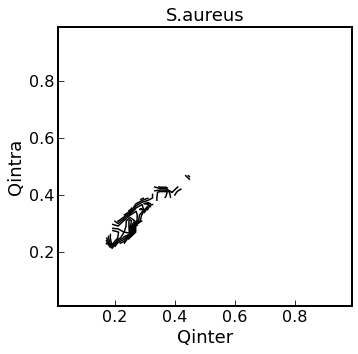

In [326]:
# S.aureus first
%cd /home/yumzhang/pikes_work/1-spin/spin/5uzu-spin/dissociate-heme/s6-ana-rep

import scipy as scipy
from scipy.optimize import curve_fit

## Heatmap
## cubehelix
def plot_heatmap(ax,start,end):
    ## this is a histogram of the number of occurrences of the observations at (x[i],y[i]).
    ## bin: 'log', use a logarithmic scale for the color map. 
    ## Internally, log10(i+1) is used to determine the hexagon color. 
    ## vmin and vmax for colorbar range
    hb=ax.hexbin(x, y,
              cmap=sns.cubehelix_palette(dark=0,light=1,as_cmap=True),
              mincnt=1,
              bins='log',
              gridsize=50,
              vmin=0,
              vmax=2.6
              )
    # show color bar
    cb = fig.colorbar(hb, ax=ax)
    ax.set_xlabel("PC1", fontsize=16)
    ax.set_ylabel("PC2", fontsize=16)
## 
def plot_2dhist(ax,start,end):
    #range is decided by Rg and EED range
    plt.hist2d(x, y,bins=(50, 50), range=np.array([(0, 1), (0, 1)]),cmap=plt.cm.jet, normed=True)
    # show color bar
    cb = plt.colorbar()
    plt.clim(0,1.2)
    ax.tick_params(labelsize=30)
    cb.ax.tick_params(labelsize=25)
    ax.set_xlabel("PC1", fontsize=16)
    ax.set_ylabel("PC2", fontsize=16)
##
def plot_2dhist_v2(ax,start,end):
    h = hist2d.Hist2D(df)
    h.plot(bins=[50,50], cmap='hot_r', contour=False, normed=True, range=[[0,1],[0,1]],grid=False, colorbar=False, xlabel='', ylabel='')
    cb = plt.colorbar()
    plt.clim(0,1.2)
    ax.tick_params(labelsize=0)


index=1
rep=40

## inter/intra of 5uzu/MPO complex
columns=[2,5]
saninter=np.loadtxt('dist-resi-native-mpo.dat',usecols=columns)
sanintra=np.loadtxt('dist-resi-native-hairpin.dat',usecols=columns)

#Qinter first
inter=np.zeros(501)
for i in range(21,61):
    
    sarepinter=np.loadtxt('450-rep'+str(i)+'/inter-'+str(i)+'.dat')
    
    time=[]
    time1=0
    ## here, line [111 111] is psedo contacts line replaced by Yumeng to specifit time block.
    # ref: /home/yumzhang/pikes_work/1-spin/xr-450-dissociate/script/s6.2*.sh
    for j in range(len(sarepinter)):
        if sarepinter[j:j+1,0] != 111:
            time1=time1
            time=np.append(time,time1)
            
        else:
            time1=time1+1
            time=np.append(time,time1)
    
    sarepinter_t=np.column_stack( (time,sarepinter) )
    #print('new data shape by time is:',sarepinter_t.shape, sarepinter_t[-1])
    #extract rows that sarepinter are native contacts.
    ref = (sarepinter[:, None] == saninter).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepinter_t=np.extract(ref,sarepinter_t).reshape(-1,3)

    #print('sarepinter, the last native contact is:',sarepinter_t[-1])
    # now we have time, contacts (comparing to native ones). CHange to Q!
    # we can do this by analyzing the occurance of col{m} 
    
    time_Qinter, Ninter = np.unique(sarepinter_t[:,0], return_counts=True)
    #print(time_Qinter.shape,Ninter.shape)
    data_inter=np.column_stack((time_Qinter, Ninter))
    #print(data_inter.shape)
    # add a fake last frame to ensure the later make up will come to the last frame
    last_fake_data= np.array([501,0])
    data_inter = np.vstack([data_inter,last_fake_data])
    #print(data_inter.shape)
    # make up missing frame, no native contact frames
    for order in range(0,501):
        if data_inter[order:order+1,0] != order:
            # In the following line, 1st order is the index before which to insert, 0 is the axis.
            data_inter=np.insert(data_inter, order, np.array((order, 0)), 0)
    data_inter[0]=[0,len(saninter)]
    # Now the data contain 502 frame: 1st initial conf, last fake capping
    #print(data_inter.shape)
    # remove the fake last frame
    data_inter=data_inter[0:501]
    #print(data_inter.shape)  
    Qinter=data_inter[:,1]/len(saninter)
    inter=np.c_[Qinter, inter]

inter=inter[:,0:rep]
ave_inter=np.mean(inter,axis=1)

#Qintra then
intra=np.zeros(501)
for i in range(21,61):
    
    sarepintra=np.loadtxt('450-rep'+str(i)+'/intra-'+str(i)+'.dat')
    
    Time=[]
    Time1=0
    ## here, line [111 111] is psedo contacts line replaced by Yumeng to specifit time block.
    # ref: /home/yumzhang/pikes_work/1-spin/xr-450-dissociate/script/s6.2*.sh
    for j in range(len(sarepintra)):
        if sarepintra[j:j+1,0] != 111:
            Time1=Time1
            Time=np.append(Time,Time1)
            
        else:
            Time1=Time1+1
            Time=np.append(Time,Time1)
    
    sarepintra_t=np.column_stack( (Time,sarepintra) )
    
    #extract rows that sarepintra are native contacts.
    ref = (sarepintra[:, None] == sanintra).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepintra_t=np.extract(ref,sarepintra_t).reshape(-1,3)

    
    # now we have time, contacts (comparing to native ones). CHange to Q!
    # we can do this by analyzing the occurance of col{m} 
    
    time_Qintra, Nintra = np.unique(sarepintra_t[:,0], return_counts=True)
    
    data_intra=np.column_stack((time_Qintra, Nintra))
    
    # add a fake last frame to ensure the later make up will come to the last frame
    last_fake_data= np.array([501,0])
    data_intra = np.vstack([data_intra,last_fake_data])
    
    # make up missing frame, no native contact frames
    for order in range(0,501):
        if data_intra[order:order+1,0] != order:
            # In the following line, 1st order is the index before which to insert, 0 is the axis.
            data_intra=np.insert(data_intra, order, np.array((order, 0)), 0)
    data_intra[0]=[0,len(sanintra)]
    # Now the data contain 502 frame: 1st initial conf, last fake capping
    # remove the fake last frame
    data_intra=data_intra[0:501]
    Qintra=data_intra[:,1]/len(sanintra)
    intra=np.c_[Qintra, intra]
## Note that now the last column of the Qintra is zero.
# remove the last column
intra=intra[:,0:rep]
ave_intra=np.mean(intra,axis=1)

##Heatmap plot
fig, ax = plt.subplots(figsize=(5, 5))

x=ave_inter
y=ave_intra

H, xedges, yedges = np.histogram2d(x,y, bins=[50, 50], range=[[0,1],[0,1]],density=True)
# plot 2d histogram in log scale
# shift minimum value to 0
H_min=min(-1*np.log(H.T)[np.isfinite(np.log(H.T))])
Z=-1*np.log(H.T)-H_min
# heatmap
extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]]
#lt.imshow(Z, aspect='auto', origin='lower', extent=extent, cmap=plt.cm.jet)
# contour
levels = np.arange(0, 15,0.5)
ax.contour(Z, levels, colors='k', origin='lower', extent=extent)
# colorbar
#cb = plt.colorbar()
# changed to (0,2) in sub_sim plots
#plt.clim(0,2)
    
plt.xlabel('Qinter',fontsize=18)
plt.ylabel('Qintra',fontsize=18)
plt.title("S.aureus",fontsize=18)
fig.tight_layout()
#cb.ax.tick_params(labelsize=16)
plt.tick_params(axis='both', labelsize=16,direction='in',length=6)
plt.rcParams['axes.linewidth'] = 2


#### *S.delphini*

/home/yumzhang/pikes_work/1-spin/spin/6bmt-spin/dissociate-heme/s6-ana-rep


/home/yumzhang/miniconda3/envs/m3tr/lib/python3.6/site-packages/ipykernel_launcher.py:174: RuntimeWarning: divide by zero encountered in log
/home/yumzhang/miniconda3/envs/m3tr/lib/python3.6/site-packages/ipykernel_launcher.py:175: RuntimeWarning: divide by zero encountered in log


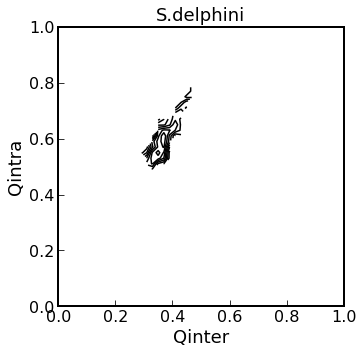

In [324]:
# S.delphini then
%cd /home/yumzhang/pikes_work/1-spin/spin/6bmt-spin/dissociate-heme/s6-ana-rep

import scipy as scipy
from scipy.optimize import curve_fit

## Heatmap
## cubehelix
def plot_heatmap(ax,start,end):
    ## this is a histogram of the number of occurrences of the observations at (x[i],y[i]).
    ## bin: 'log', use a logarithmic scale for the color map. 
    ## Internally, log10(i+1) is used to determine the hexagon color. 
    ## vmin and vmax for colorbar range
    hb=ax.hexbin(x, y,
              cmap=sns.cubehelix_palette(dark=0,light=1,as_cmap=True),
              mincnt=1,
              bins='log',
              gridsize=50,
              vmin=0,
              vmax=2.6
              )
    # show color bar
    cb = fig.colorbar(hb, ax=ax)
    ax.set_xlabel("PC1", fontsize=16)
    ax.set_ylabel("PC2", fontsize=16)
## 
def plot_2dhist(ax,start,end):
    #range is decided by Rg and EED range
    plt.hist2d(x, y,bins=(50, 50), range=np.array([(0, 1), (0, 1)]),cmap=plt.cm.jet, normed=True)
    # show color bar
    cb = plt.colorbar()
    plt.clim(0,1.2)
    ax.tick_params(labelsize=30)
    cb.ax.tick_params(labelsize=25)
    ax.set_xlabel("PC1", fontsize=16)
    ax.set_ylabel("PC2", fontsize=16)
##
def plot_2dhist_v2(ax,start,end):
    h = hist2d.Hist2D(df)
    h.plot(bins=[50,50], cmap='hot_r', contour=False, normed=True, range=[[0,1],[0,1]],grid=False, colorbar=False, xlabel='', ylabel='')
    cb = plt.colorbar()
    plt.clim(0,1.2)
    ax.tick_params(labelsize=0)


index=1
rep=40

## inter/intra of 5uzu/MPO complex
columns=[2,5]
saninter=np.loadtxt('dist-resi-native-mpo.dat',usecols=columns)
sanintra=np.loadtxt('dist-resi-native-hairpin.dat',usecols=columns)

#Qinter first
inter=np.zeros(501)
for i in range(21,61):
    
    sarepinter=np.loadtxt('450-rep'+str(i)+'/inter-'+str(i)+'.dat')
    
    time=[]
    time1=0
    ## here, line [111 111] is psedo contacts line replaced by Yumeng to specifit time block.
    # ref: /home/yumzhang/pikes_work/1-spin/xr-450-dissociate/script/s6.2*.sh
    for j in range(len(sarepinter)):
        if sarepinter[j:j+1,0] != 111:
            time1=time1
            time=np.append(time,time1)
            
        else:
            time1=time1+1
            time=np.append(time,time1)
    
    sarepinter_t=np.column_stack( (time,sarepinter) )
    #print('new data shape by time is:',sarepinter_t.shape, sarepinter_t[-1])
    #extract rows that sarepinter are native contacts.
    ref = (sarepinter[:, None] == saninter).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepinter_t=np.extract(ref,sarepinter_t).reshape(-1,3)

    #print('sarepinter, the last native contact is:',sarepinter_t[-1])
    # now we have time, contacts (comparing to native ones). CHange to Q!
    # we can do this by analyzing the occurance of col{m} 
    
    time_Qinter, Ninter = np.unique(sarepinter_t[:,0], return_counts=True)
    #print(time_Qinter.shape,Ninter.shape)
    data_inter=np.column_stack((time_Qinter, Ninter))
    #print(data_inter.shape)
    # add a fake last frame to ensure the later make up will come to the last frame
    last_fake_data= np.array([501,0])
    data_inter = np.vstack([data_inter,last_fake_data])
    #print(data_inter.shape)
    # make up missing frame, no native contact frames
    for order in range(0,501):
        if data_inter[order:order+1,0] != order:
            # In the following line, 1st order is the index before which to insert, 0 is the axis.
            data_inter=np.insert(data_inter, order, np.array((order, 0)), 0)
    data_inter[0]=[0,len(saninter)]
    # Now the data contain 502 frame: 1st initial conf, last fake capping
    #print(data_inter.shape)
    # remove the fake last frame
    data_inter=data_inter[0:501]
    #print(data_inter.shape)  
    Qinter=data_inter[:,1]/len(saninter)
    inter=np.c_[Qinter, inter]

inter=inter[:,0:rep]
ave_inter=np.mean(inter,axis=1)

#Qintra then
intra=np.zeros(501)
for i in range(21,61):
    
    sarepintra=np.loadtxt('450-rep'+str(i)+'/intra-'+str(i)+'.dat')
    
    Time=[]
    Time1=0
    ## here, line [111 111] is psedo contacts line replaced by Yumeng to specifit time block.
    # ref: /home/yumzhang/pikes_work/1-spin/xr-450-dissociate/script/s6.2*.sh
    for j in range(len(sarepintra)):
        if sarepintra[j:j+1,0] != 111:
            Time1=Time1
            Time=np.append(Time,Time1)
            
        else:
            Time1=Time1+1
            Time=np.append(Time,Time1)
    
    sarepintra_t=np.column_stack( (Time,sarepintra) )
    
    #extract rows that sarepintra are native contacts.
    ref = (sarepintra[:, None] == sanintra).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepintra_t=np.extract(ref,sarepintra_t).reshape(-1,3)

    
    # now we have time, contacts (comparing to native ones). CHange to Q!
    # we can do this by analyzing the occurance of col{m} 
    
    time_Qintra, Nintra = np.unique(sarepintra_t[:,0], return_counts=True)
    
    data_intra=np.column_stack((time_Qintra, Nintra))
    
    # add a fake last frame to ensure the later make up will come to the last frame
    last_fake_data= np.array([501,0])
    data_intra = np.vstack([data_intra,last_fake_data])
    
    # make up missing frame, no native contact frames
    for order in range(0,501):
        if data_intra[order:order+1,0] != order:
            # In the following line, 1st order is the index before which to insert, 0 is the axis.
            data_intra=np.insert(data_intra, order, np.array((order, 0)), 0)
    data_intra[0]=[0,len(sanintra)]
    # Now the data contain 502 frame: 1st initial conf, last fake capping
    # remove the fake last frame
    data_intra=data_intra[0:501]
    Qintra=data_intra[:,1]/len(sanintra)
    intra=np.c_[Qintra, intra]
## Note that now the last column of the Qintra is zero.
# remove the last column
intra=intra[:,0:rep]
ave_intra=np.mean(intra,axis=1)

##Heatmap plot
fig, ax = plt.subplots(figsize=(5, 5))

x=ave_inter
y=ave_intra

H, xedges, yedges = np.histogram2d(x,y, bins=[50, 50], range=[[0,1],[0,1]],density=True)
# plot 2d histogram in log scale
# shift minimum value to 0
H_min=min(-1*np.log(H.T)[np.isfinite(np.log(H.T))])
Z=-1*np.log(H.T)-H_min
# heatmap
extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]]
#plt.imshow(Z, aspect='auto', origin='lower', extent=extent, cmap=plt.cm.jet)
# contour
levels = np.arange(0, 15, 0.5)
ax.contour(Z, levels, colors='k', origin='lower', extent=extent)
# colorbar
#cb = plt.colorbar()
# changed to (0,2) in sub_sim plots
#plt.clim(0,2)
    
plt.xlabel('Qinter',fontsize=18)
plt.ylabel('Qintra',fontsize=18)
plt.xlim([0,1])
plt.ylim([0,1])
plt.title("S.delphini",fontsize=18)
fig.tight_layout()
#cb.ax.tick_params(labelsize=16)
plt.tick_params(axis='both', labelsize=16,direction='in',length=6)
plt.rcParams['axes.linewidth'] = 2

# 3. The hairpin stability of *S.aureus* vs. *S.delphini* 
**Discussion Focus**

In this part, we need to see if the dissociation related with the stability of the hairpin.

Pre_conclusion:

*S.delphini* has more stable NTD

**System**
```
Two Species simulations:
hairpin:
/home/yumzhang/pikes_work/1-spin/hairpinex1/5uzu/s5-20
/home/yumzhang/pikes_work/1-spin/hairpinex1/6bmt/s5-20

Setup:
a. 20 reps
b. 300K NPT
c. only 12 residues per hairpin from folded conformation
```

**Question**
```
contact including backbone should be considered or not
```


## Conclusion

1. *S.aureus*-NTD is easier to unfold.

2. *S.delphini*-NTD can unfold faster... ?

***S.aureus* vs. *S.delphini***

*S.aureus*:

$Q_{NTD} = 0.39*e^{-0.04*T}+0.40$ 

*S.delphini*:

$Q_{NTD} = 0.35*e^{-0.15*T}+0.57$ 

Yumeng's point: we may need to kick out the folded replicas...
Yumeng's results: does NOT work...

## Stability analysis:
```
1. Each rep unfold rate (20)
2. Ave Fit line
```

### 3.1 Stability per rep

#### *S.aureus*

/home/yumzhang/pikes_work/1-spin/hairpinex1/5uzu/s6


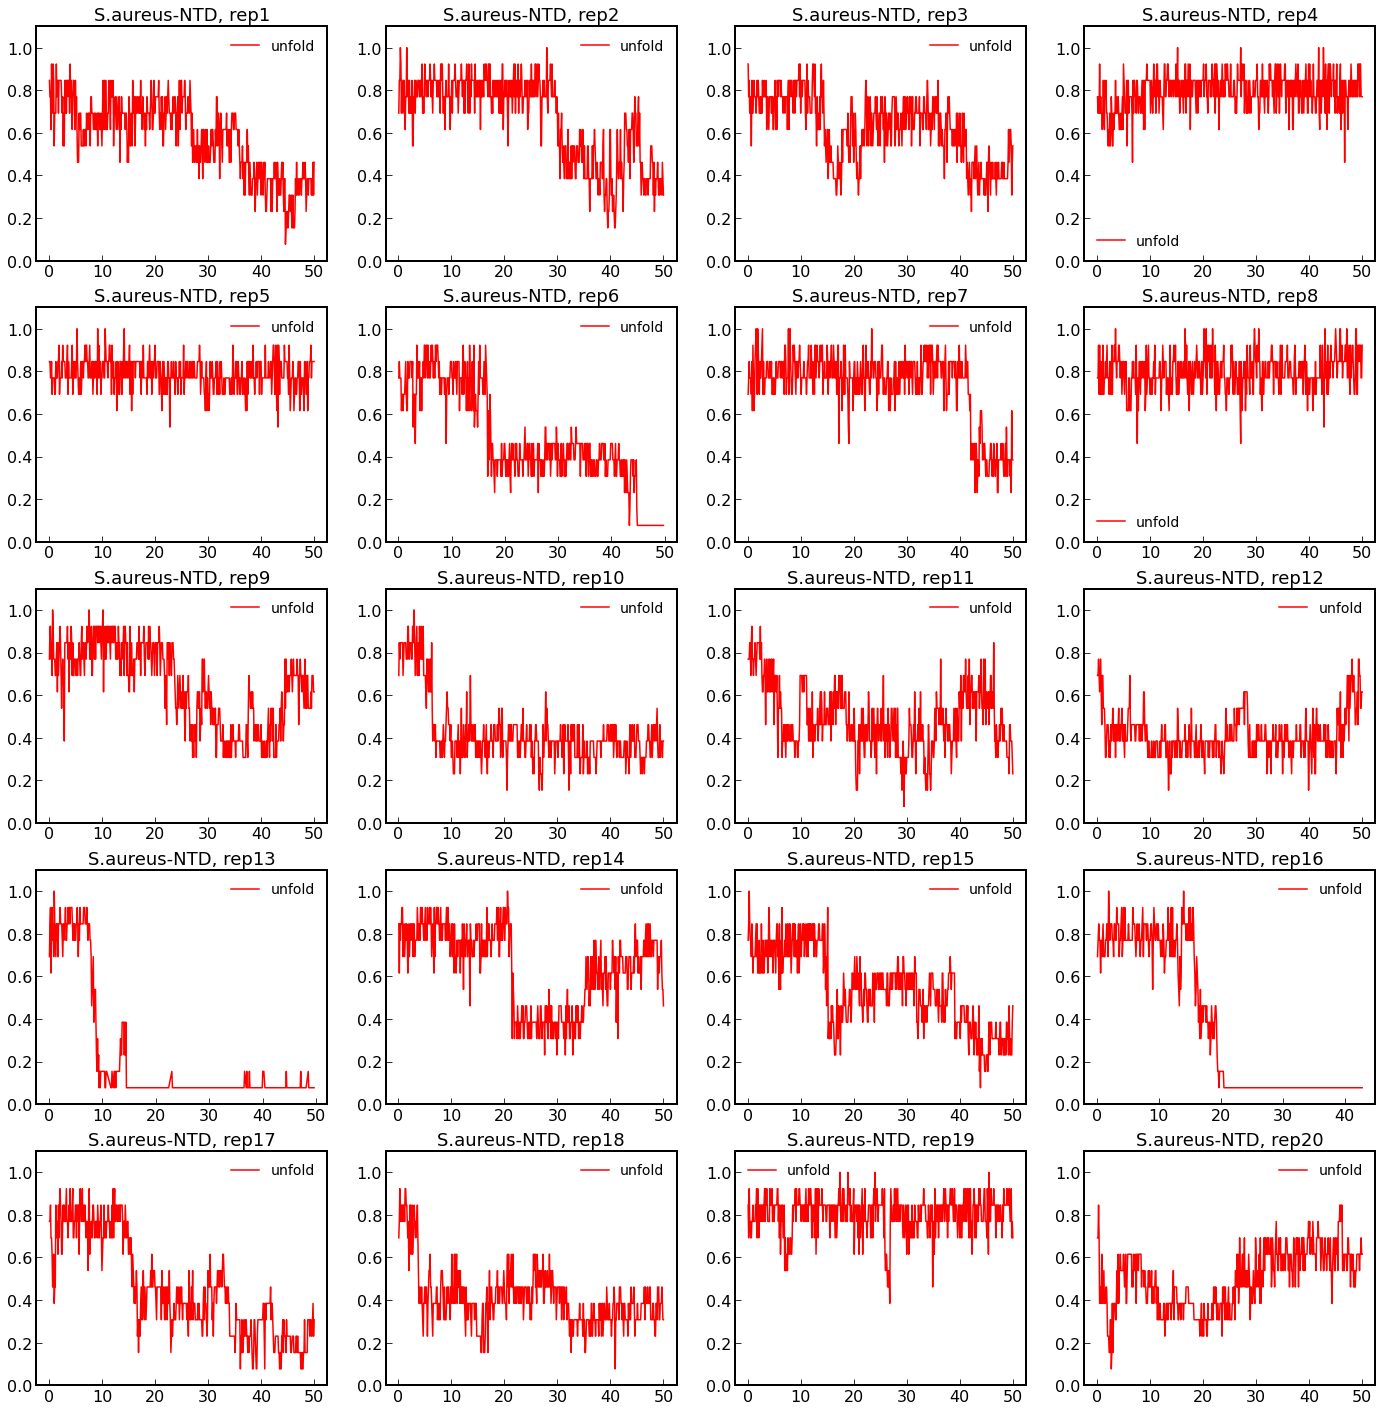

In [296]:
# S.aureus first
%cd /home/yumzhang/pikes_work/1-spin/hairpinex1/5uzu/s6

import scipy as scipy
from scipy.optimize import curve_fit

index=1
rep=20

## intra of 5uzu/MPO complex
columns=[2,5]
sanintra=np.loadtxt('native-hairpin-fromcomplex.dat',usecols=columns)

for i in range(1,21):

    sarepintra=np.loadtxt('300-rep'+str(i)+'/intra-'+str(i)+'.dat')
    
    Time=[]
    Time1=0

    for j in range(len(sarepintra)):
        if sarepintra[j:j+1,0] != 111:
            Time1=Time1
            Time=np.append(Time,Time1)
            
        else:
            Time1=Time1+1
            Time=np.append(Time,Time1)
    #print(str(i),',intra time is:',Time[-1])
    
    sarepintra_t=np.column_stack( (Time,sarepintra) )
    ref = (sarepintra[:, None] == sanintra).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepintra_t=np.extract(ref,sarepintra_t).reshape(-1,3)

    time_Qintra, Nintra = np.unique(sarepintra_t[:,0], return_counts=True)
    
    Qintra=Nintra/len(sanintra)
    
    
    plt.rcParams["figure.figsize"] = (24,25)
    plt.subplot(5,4,index)
    
    plt.plot(time_Qintra/10,Qintra,label='unfold',c='r')
    plt.title('S.aureus-NTD, rep'+str(i),fontsize=18)
    plt.ylim([0,1.1])
    plt.legend(fontsize=14,frameon=False)
    plt.tick_params(axis='both', labelsize=16,direction='in',length=6)
    plt.rcParams['axes.linewidth'] = 2
    index=index+1

In [299]:
# Unfold  replicas (roughly estimated)
%cd /home/yumzhang/pikes_work/1-spin/hairpinex1/5uzu/s6

import scipy as scipy
from scipy.optimize import curve_fit

index=1
rep=20

## intra of 5uzu/MPO complex
columns=[2,5]
sanintra=np.loadtxt('native-hairpin-fromcomplex.dat',usecols=columns)

Cond_A=["Fold, Rep"]
Cond_B=["Unfold, Rep"]
for i in range(1,21):

    sarepintra=np.loadtxt('300-rep'+str(i)+'/intra-'+str(i)+'.dat')
    
    time=[]
    time1=0
    for j in range(len(sarepintra)):
        if sarepintra[j:j+1,0] != 111:
            time1=time1
            time=np.append(time,time1)
            
        else:
            time1=time1+1
            time=np.append(time,time1)
    
    sarepintra_t=np.column_stack( (time,sarepintra) )
    ref = (sarepintra[:, None] == sanintra).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepintra_t=np.extract(ref,sarepintra_t).reshape(-1,3)
    
    time_Qintra, Nintra = np.unique(sarepintra_t[:,0], return_counts=True)
    data_intra=np.column_stack((time_Qintra, Nintra))
    last_fake_data= np.array([501,0])
    data_intra = np.vstack([data_intra,last_fake_data])
    
    for order in range(0,501):
        if data_intra[order:order+1,0] != order:
            
            data_intra=np.insert(data_intra, order, np.array((order, 0)), 0)
    data_intra[0]=[0,len(sanintra)]
    
    Qintra=data_intra[:,1]/len(sanintra)
    ## skip the first 10 ns
    Qintra=Qintra[100:500]
    ave_q=np.mean(Qintra)
    if ave_q >0.45:
        Cond_A=np.append(Cond_A,int(i))
    else:
        Cond_B=np.append(Cond_B,int(i))
        
    
print('S.aureus:')    
print(". ".join(Cond_A))
print(". ".join(Cond_B))

/home/yumzhang/pikes_work/1-spin/hairpinex1/5uzu/s6
S.aureus:
Fold, Rep. 1. 2. 3. 4. 5. 7. 8. 9. 11. 14. 15. 19. 20
Unfold, Rep. 6. 10. 12. 13. 16. 17. 18


**Sub-conclusions**
1. For *S.aureus*, 7/20 replicas unfold at 300K.

#### *S.delphini*

/home/yumzhang/pikes_work/1-spin/hairpinex1/6bmt/s6


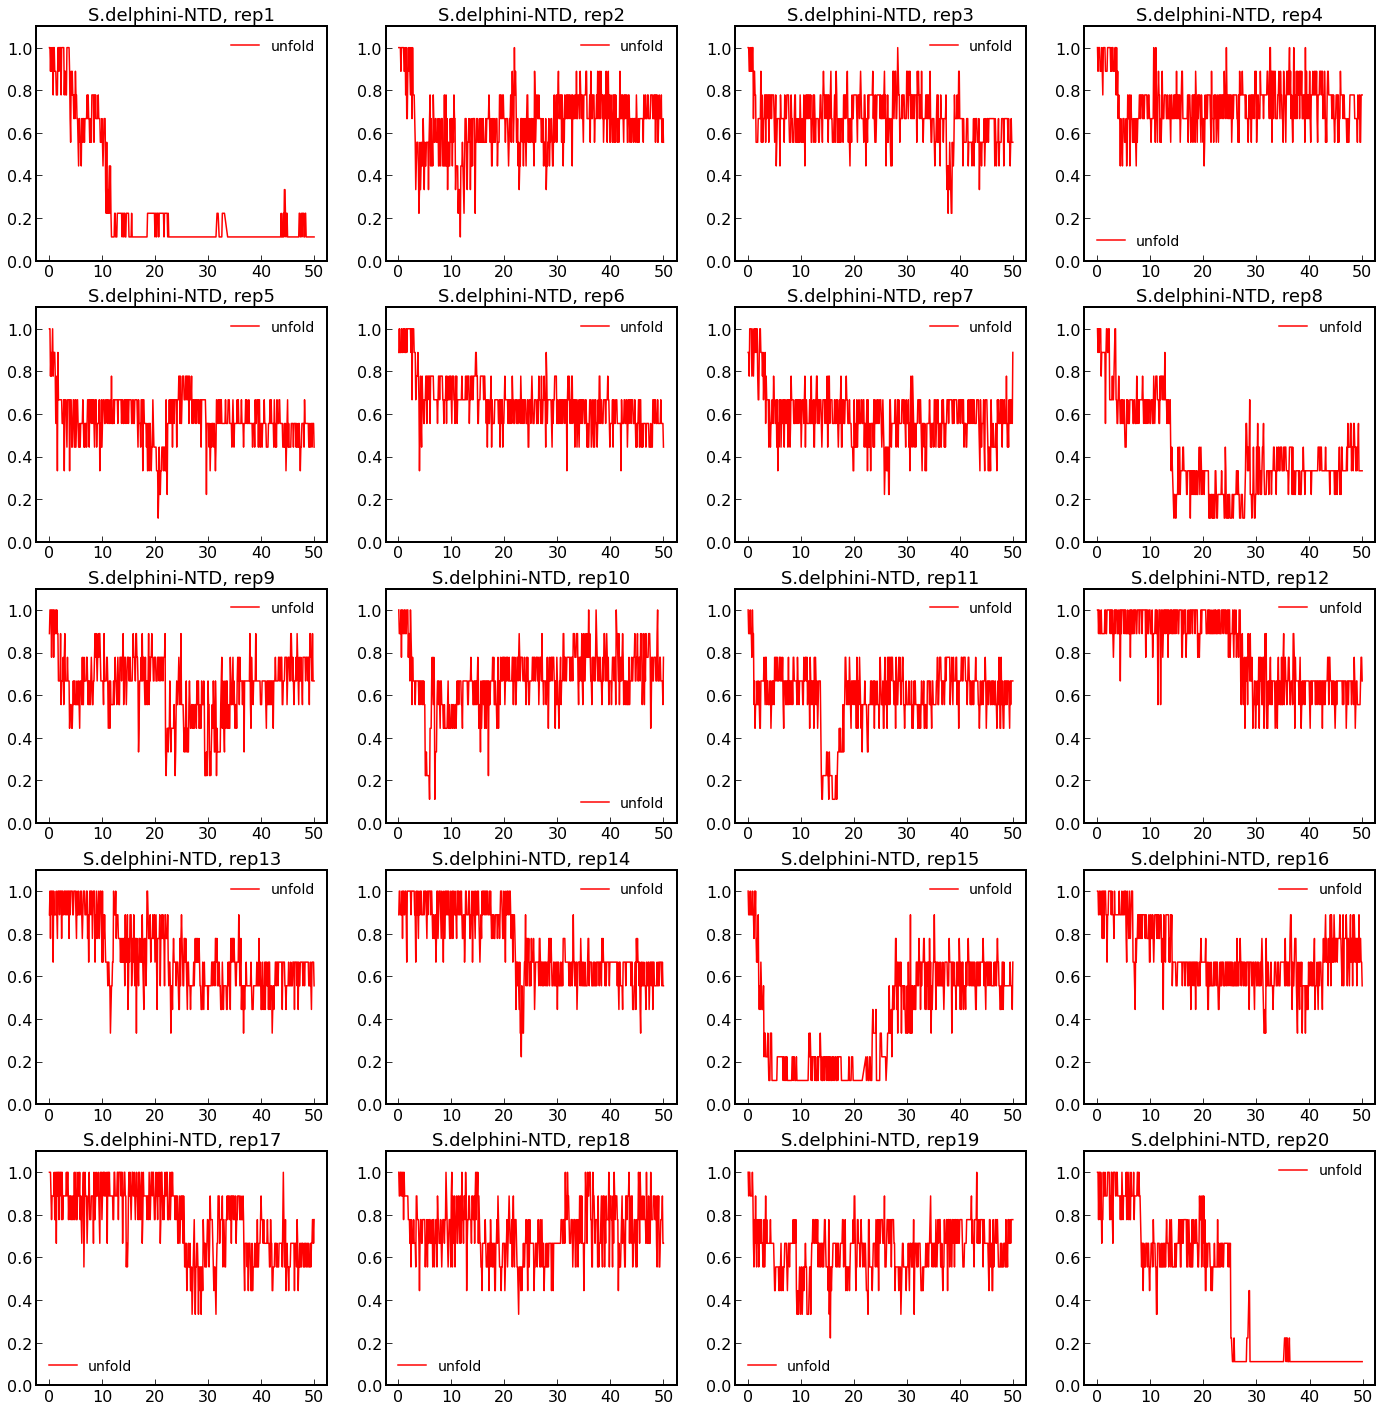

In [300]:
# S.delphini then
%cd /home/yumzhang/pikes_work/1-spin/hairpinex1/6bmt/s6

import scipy as scipy
from scipy.optimize import curve_fit

index=1
rep=20

## intra of 6bmt/MPO complex
columns=[2,5]
sanintra=np.loadtxt('native-hairpin-fromcomplex.dat',usecols=columns)


for i in range(1,21):

    sarepintra=np.loadtxt('300-rep'+str(i)+'/intra-'+str(i)+'.dat')
    
    Time=[]
    Time1=0

    for j in range(len(sarepintra)):
        if sarepintra[j:j+1,0] != 111:
            Time1=Time1
            Time=np.append(Time,Time1)
            
        else:
            Time1=Time1+1
            Time=np.append(Time,Time1)
    #print(str(i),',intra time is:',Time[-1])
    
    sarepintra_t=np.column_stack( (Time,sarepintra) )
    ref = (sarepintra[:, None] == sanintra).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepintra_t=np.extract(ref,sarepintra_t).reshape(-1,3)

    time_Qintra, Nintra = np.unique(sarepintra_t[:,0], return_counts=True)
    
    Qintra=Nintra/len(sanintra)
    
    
    plt.rcParams["figure.figsize"] = (24,25)
    plt.subplot(5,4,index)
    
    plt.plot(time_Qintra/10,Qintra,label='unfold',c='r')
    plt.title('S.delphini-NTD, rep'+str(i),fontsize=18)
    plt.ylim([0,1.1])
    plt.legend(fontsize=14,frameon=False)
    plt.tick_params(axis='both', labelsize=16,direction='in',length=6)
    plt.rcParams['axes.linewidth'] = 2
    index=index+1

In [301]:
# Unfold  replicas (roughly estimated
%cd /home/yumzhang/pikes_work/1-spin/hairpinex1/6bmt/s6

import scipy as scipy
from scipy.optimize import curve_fit

index=1
rep=20

## intra of 5uzu/MPO complex
columns=[2,5]
sanintra=np.loadtxt('native-hairpin-fromcomplex.dat',usecols=columns)

Cond_A=["Fold, Rep"]
Cond_B=["Unfold, Rep"]
for i in range(1,21):

    sarepintra=np.loadtxt('300-rep'+str(i)+'/intra-'+str(i)+'.dat')
    
    time=[]
    time1=0
    for j in range(len(sarepintra)):
        if sarepintra[j:j+1,0] != 111:
            time1=time1
            time=np.append(time,time1)
            
        else:
            time1=time1+1
            time=np.append(time,time1)
    
    sarepintra_t=np.column_stack( (time,sarepintra) )
    ref = (sarepintra[:, None] == sanintra).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepintra_t=np.extract(ref,sarepintra_t).reshape(-1,3)
    
    time_Qintra, Nintra = np.unique(sarepintra_t[:,0], return_counts=True)
    data_intra=np.column_stack((time_Qintra, Nintra))
    last_fake_data= np.array([501,0])
    data_intra = np.vstack([data_intra,last_fake_data])
    
    for order in range(0,501):
        if data_intra[order:order+1,0] != order:
            
            data_intra=np.insert(data_intra, order, np.array((order, 0)), 0)
    data_intra[0]=[0,len(sanintra)]
    
    Qintra=data_intra[:,1]/len(sanintra)
    ## skip the first 10 ns
    Qintra=Qintra[100:500]
    ave_q=np.mean(Qintra)
    
    if ave_q >0.45:
        Cond_A=np.append(Cond_A,int(i))
    else:
        Cond_B=np.append(Cond_B,int(i))
        
    
print('S.delphini:')    
print(". ".join(Cond_A))
print(". ".join(Cond_B))

/home/yumzhang/pikes_work/1-spin/hairpinex1/6bmt/s6
S.delphini:
Fold, Rep. 2. 3. 4. 5. 6. 7. 9. 10. 11. 12. 13. 14. 16. 17. 18. 19
Unfold, Rep. 1. 8. 15. 20


**Sub-conclusions**
1. For *S.delphini*, there are 4/20 hairpin unfold within 50 ns.

### 3.2 Ave Stability

#### All 20 replicas 
*S.aureus* and *S.delphini* together

/home/yumzhang/pikes_work/1-spin/hairpinex1/5uzu/s6
S.aureus, fit_intra: a 0.387591558613696 S.aureus, fit_intra: b -0.04274610713782698 S.aureus, fit_intra: c 0.4033230747552098
/home/yumzhang/pikes_work/1-spin/hairpinex1/6bmt/s6
S.delphini, fit_intra: a 0.3554133298920586 S.delphini, fit_intra: b -0.15885466864782313 S.delphini, fit_intra: c 0.5708596056496537


Text(0, 0.5, 'Fraction')

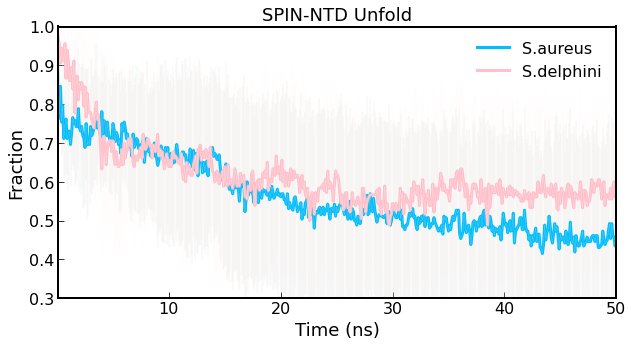

In [306]:
import scipy as scipy
from scipy.optimize import curve_fit

def exp_fit(x,a,b,c):
    y = a*np.exp(b*x)+c
    return y

#S.aureus
%cd /home/yumzhang/pikes_work/1-spin/hairpinex1/5uzu/s6

index=1
rep=20

## intra of 5uzu/MPO complex
columns=[2,5]
sanintra=np.loadtxt('native-hairpin-fromcomplex.dat',usecols=columns)

sa_intra=np.zeros(501)

for i in range(1,21):

    sarepintra=np.loadtxt('300-rep'+str(i)+'/intra-'+str(i)+'.dat')
    
    time=[]
    time1=0
    for j in range(len(sarepintra)):
        if sarepintra[j:j+1,0] != 111:
            time1=time1
            time=np.append(time,time1)
            
        else:
            time1=time1+1
            time=np.append(time,time1)
    
    sarepintra_t=np.column_stack( (time,sarepintra) )
    ref = (sarepintra[:, None] == sanintra).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepintra_t=np.extract(ref,sarepintra_t).reshape(-1,3)
    
    time_Qintra, Nintra = np.unique(sarepintra_t[:,0], return_counts=True)
    data_intra=np.column_stack((time_Qintra, Nintra))
    last_fake_data= np.array([501,0])
    data_intra = np.vstack([data_intra,last_fake_data])
    
    for order in range(0,501):
        if data_intra[order:order+1,0] != order:
            
            data_intra=np.insert(data_intra, order, np.array((order, 0)), 0)
    data_intra[0]=[0,len(sanintra)]
    
    data_intra=data_intra[0:501]
    Qintra=data_intra[:,1]/len(sanintra)
    sa_intra=np.c_[Qintra, sa_intra]
#print(sa_intra.shape)
sa_intra=sa_intra[:,0:rep]
sa_ave_intra=np.mean(sa_intra,axis=1)
sa_std_intra=np.std(sa_intra,axis=1)

poptintra, pcovintra = scipy.optimize.curve_fit(exp_fit, data_intra[:,0]/10, sa_ave_intra,p0=[1,-0.5,1])

print("S.aureus, fit_intra: a",poptintra[0],
      "S.aureus, fit_intra: b",poptintra[1],
      "S.aureus, fit_intra: c",poptintra[2],)

#S.delphini
%cd /home/yumzhang/pikes_work/1-spin/hairpinex1/6bmt/s6

index=1
rep=20

## intra of 5uzu/MPO complex
columns=[2,5]
sdnintra=np.loadtxt('native-hairpin-fromcomplex.dat',usecols=columns)

sd_intra=np.zeros(501)

for i in range(1,21):

    sdrepintra=np.loadtxt('300-rep'+str(i)+'/intra-'+str(i)+'.dat')
    
    time=[]
    time1=0
    for j in range(len(sdrepintra)):
        if sdrepintra[j:j+1,0] != 111:
            time1=time1
            time=np.append(time,time1)
            
        else:
            time1=time1+1
            time=np.append(time,time1)
    
    sdrepintra_t=np.column_stack( (time,sdrepintra) )
    ref = (sdrepintra[:, None] == sdnintra).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sdrepintra_t=np.extract(ref,sdrepintra_t).reshape(-1,3)
    
    sd_time_Qintra, sd_Nintra = np.unique(sdrepintra_t[:,0], return_counts=True)
    sd_data_intra=np.column_stack((sd_time_Qintra, sd_Nintra))
    sd_last_fake_data= np.array([501,0])
    sd_data_intra = np.vstack([sd_data_intra,sd_last_fake_data])
    
    for order in range(0,501):
        if sd_data_intra[order:order+1,0] != order:
            
            sd_data_intra=np.insert(sd_data_intra, order, np.array((order, 0)), 0)
    sd_data_intra[0]=[0,len(sdnintra)]
    
    sd_data_intra=sd_data_intra[0:501]
    sd_Qintra=sd_data_intra[:,1]/len(sdnintra)
    sd_intra=np.c_[sd_Qintra, sd_intra]
#print(sd_intra.shape)
sd_intra=sd_intra[:,0:rep]
sd_ave_intra=np.mean(sd_intra,axis=1)
sd_std_intra=np.std(sd_intra,axis=1)

poptintrasd, pcovintrasd = scipy.optimize.curve_fit(exp_fit, sd_data_intra[:,0]/10, sd_ave_intra,p0=[1,-0.5,1])

print("S.delphini, fit_intra: a",poptintrasd[0],
      "S.delphini, fit_intra: b",poptintrasd[1],
      "S.delphini, fit_intra: c",poptintrasd[2],)

plt.tick_params(axis='both', labelsize=16,direction='in',length=6)
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(data_intra[:,0]/10,sa_ave_intra,color='deepskyblue',label='S.aureus',linewidth=3)
plt.plot(sd_data_intra[:,0]/10,sd_ave_intra,color='pink',label='S.delphini',linewidth=3)
plt.errorbar(data_intra[:,0]/10,sa_ave_intra,yerr=sa_std_intra,linewidth=0.2,color='lightgrey')
plt.errorbar(sd_data_intra[:,0]/10,sd_ave_intra,yerr=sd_std_intra,linewidth=0.2,color='seashell')
plt.legend(fontsize=16,frameon=False)
plt.ylim([0.3,1])
plt.xlim([0.1,50])
plt.title("SPIN-NTD Unfold",fontsize=18)
plt.xlabel("Time (ns)", fontsize=18)
plt.ylabel("Fraction", fontsize=18)



***S.aureus* vs. *S.delphini***

*S.aureus*:

$Q_{NTD} = 0.39*e^{-0.04*T}+0.40$ 

*S.delphini*:

$Q_{NTD} = 0.35*e^{-0.15*T}+0.57$ 


**Sub-conclusions**

*S.delphini* has a tendency to unfold first but then become very stable...

#### Unfolded Replicas Solely

Since we have a pre-understanding that for 20 replicas, more unfolding events for *S.aureus*, we can then focus on these replicas solely.

/home/yumzhang/pikes_work/1-spin/hairpinex1/5uzu/s6
S.aureus, fit_intra: a 0.649462417645207 S.aureus, fit_intra: b -0.06637553421611242 S.aureus, fit_intra: c 0.19241962168671753
/home/yumzhang/pikes_work/1-spin/hairpinex1/6bmt/s6
S.delphini, fit_intra: a 0.7520225381028407 S.delphini, fit_intra: b -0.13124834398369725 S.delphini, fit_intra: c 0.24288157082014591


Text(0, 0.5, 'Fraction')

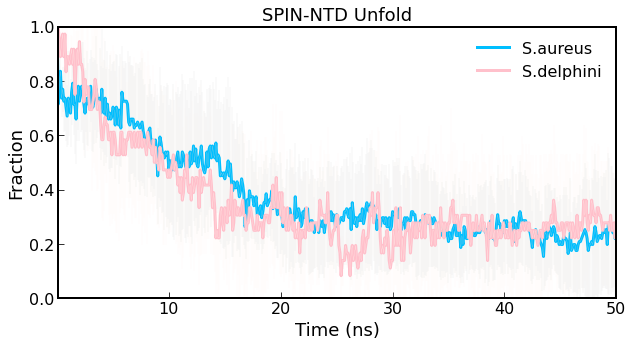

In [305]:
import scipy as scipy
from scipy.optimize import curve_fit

def exp_fit(x,a,b,c):
    y = a*np.exp(b*x)+c
    return y

#S.aureus
%cd /home/yumzhang/pikes_work/1-spin/hairpinex1/5uzu/s6

index=1
rep1=7

## intra of 5uzu/MPO complex
columns=[2,5]
sanintra=np.loadtxt('native-hairpin-fromcomplex.dat',usecols=columns)

sa_intra=np.zeros(501)

# S.aureus unfold replicas
for i in [6,10,12,13,16,17,18]:

    sarepintra=np.loadtxt('300-rep'+str(i)+'/intra-'+str(i)+'.dat')
    
    time=[]
    time1=0
    for j in range(len(sarepintra)):
        if sarepintra[j:j+1,0] != 111:
            time1=time1
            time=np.append(time,time1)
            
        else:
            time1=time1+1
            time=np.append(time,time1)
    
    sarepintra_t=np.column_stack( (time,sarepintra) )
    ref = (sarepintra[:, None] == sanintra).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sarepintra_t=np.extract(ref,sarepintra_t).reshape(-1,3)
    
    time_Qintra, Nintra = np.unique(sarepintra_t[:,0], return_counts=True)
    data_intra=np.column_stack((time_Qintra, Nintra))
    last_fake_data= np.array([501,0])
    data_intra = np.vstack([data_intra,last_fake_data])
    
    for order in range(0,501):
        if data_intra[order:order+1,0] != order:
            
            data_intra=np.insert(data_intra, order, np.array((order, 0)), 0)
    data_intra[0]=[0,len(sanintra)]
    
    data_intra=data_intra[0:501]
    Qintra=data_intra[:,1]/len(sanintra)
    sa_intra=np.c_[Qintra, sa_intra]
#print(sa_intra.shape)
sa_intra=sa_intra[:,0:rep1]
sa_ave_intra=np.mean(sa_intra,axis=1)
sa_std_intra=np.std(sa_intra,axis=1)

poptintra, pcovintra = scipy.optimize.curve_fit(exp_fit, data_intra[:,0]/10, sa_ave_intra,p0=[1,-0.5,1])

print("S.aureus, fit_intra: a",poptintra[0],
      "S.aureus, fit_intra: b",poptintra[1],
      "S.aureus, fit_intra: c",poptintra[2],)

#S.delphini
%cd /home/yumzhang/pikes_work/1-spin/hairpinex1/6bmt/s6

index=1
rep2=4

## intra of 5uzu/MPO complex
columns=[2,5]
sdnintra=np.loadtxt('native-hairpin-fromcomplex.dat',usecols=columns)

sd_intra=np.zeros(501)

# S.delphini unfold replicas
for i in [1,8,15,20]:

    sdrepintra=np.loadtxt('300-rep'+str(i)+'/intra-'+str(i)+'.dat')
    
    time=[]
    time1=0
    for j in range(len(sdrepintra)):
        if sdrepintra[j:j+1,0] != 111:
            time1=time1
            time=np.append(time,time1)
            
        else:
            time1=time1+1
            time=np.append(time,time1)
    
    sdrepintra_t=np.column_stack( (time,sdrepintra) )
    ref = (sdrepintra[:, None] == sdnintra).all(-1).any(-1)
    ref=np.repeat(ref, 3).reshape(-1,3)
    
    sdrepintra_t=np.extract(ref,sdrepintra_t).reshape(-1,3)
    
    sd_time_Qintra, sd_Nintra = np.unique(sdrepintra_t[:,0], return_counts=True)
    sd_data_intra=np.column_stack((sd_time_Qintra, sd_Nintra))
    sd_last_fake_data= np.array([501,0])
    sd_data_intra = np.vstack([sd_data_intra,sd_last_fake_data])
    
    for order in range(0,501):
        if sd_data_intra[order:order+1,0] != order:
            
            sd_data_intra=np.insert(sd_data_intra, order, np.array((order, 0)), 0)
    sd_data_intra[0]=[0,len(sdnintra)]
    
    sd_data_intra=sd_data_intra[0:501]
    sd_Qintra=sd_data_intra[:,1]/len(sdnintra)
    sd_intra=np.c_[sd_Qintra, sd_intra]
#print(sd_intra.shape)
sd_intra=sd_intra[:,0:rep2]
sd_ave_intra=np.mean(sd_intra,axis=1)
sd_std_intra=np.std(sd_intra,axis=1)

poptintrasd, pcovintrasd = scipy.optimize.curve_fit(exp_fit, sd_data_intra[:,0]/10, sd_ave_intra,p0=[1,-0.5,1])

print("S.delphini, fit_intra: a",poptintrasd[0],
      "S.delphini, fit_intra: b",poptintrasd[1],
      "S.delphini, fit_intra: c",poptintrasd[2],)

plt.tick_params(axis='both', labelsize=16,direction='in',length=6)
plt.rcParams['axes.linewidth'] = 2
plt.rcParams["figure.figsize"] = (10,5)
plt.plot(data_intra[:,0]/10,sa_ave_intra,color='deepskyblue',label='S.aureus',linewidth=3)
plt.plot(sd_data_intra[:,0]/10,sd_ave_intra,color='pink',label='S.delphini',linewidth=3)
plt.errorbar(data_intra[:,0]/10,sa_ave_intra,yerr=sa_std_intra,linewidth=0.2,color='lightgrey')
plt.errorbar(sd_data_intra[:,0]/10,sd_ave_intra,yerr=sd_std_intra,linewidth=0.2,color='seashell')
plt.legend(fontsize=16,frameon=False)
plt.ylim([0,1])
plt.xlim([0.1,50])
plt.title("SPIN-NTD Unfold",fontsize=18)
plt.xlabel("Time (ns)", fontsize=18)
plt.ylabel("Fraction", fontsize=18)


***S.aureus* vs. *S.delphini***

*S.aureus*:

$Q_{NTD} = 0.65*e^{-0.07*T}+0.19$ 

*S.delphini*:

$Q_{NTD} = 0.75*e^{-0.13*T}+0.24$ 


**Sub-conclusions**

The unfolding process of *S.delphini* and *S.aureus* is very similar...

The specific selection of folded replicas does NOT work effectively...